# **Optimizing Pet Adoption With Machine Learning** 
## Group 6

## **Data Load**

In [100]:
train_df = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\train\\train.csv')
test_df = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\test\\test.csv')
color_df = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\ColorLabels.csv')
breed_df = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\BreedLabels.csv')

## **EDA**

In [101]:

#Loading libraries
import pandas as pd
import numpy as np

#Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [102]:

#Loading dataset
df_train = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\train\\train.csv')
df_test = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\test\\test.csv')


#Displaying First 5 rows
df_train.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

Data Description
*  Overviewing of data types, missing data, and number of rows


In [103]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

*   The distribution of numerical and categorical data

In [104]:
df_train.describe().T

count          mean         std      min      25%      50%  \
Type           14993.0      1.457614    0.498217      1.0      1.0      1.0   
Age            14993.0     10.452078   18.155790      0.0      2.0      3.0   
Breed1         14993.0    265.272594   60.056818      0.0    265.0    266.0   
Breed2         14993.0     74.009738  123.011575      0.0      0.0      0.0   
Gender         14993.0      1.776162    0.681592      1.0      1.0      2.0   
Color1         14993.0      2.234176    1.745225      1.0      1.0      2.0   
Color2         14993.0      3.222837    2.742562      0.0      0.0      2.0   
Color3         14993.0      1.882012    2.984086      0.0      0.0      0.0   
MaturitySize   14993.0      1.862002    0.547959      1.0      2.0      2.0   
FurLength      14993.0      1.467485    0.599070      1.0      1.0      1.0   
Vaccinated     14993.0      1.731208    0.667649      1.0      1.0      2.0   
Dewormed       14993.0      1.558727    0.695817      1.0      1.0      1.0   
Sterilized     14993.0      1.914227    0.566172      1.0      2.0      2.0   
Health         14993.0      1.036617    0.199535      1.0      1.0      1.0   
Quantity       14993.0      1.576069    1.472477      1.0      1.0      1.0   
Fee            14993.0     21.259988   78.414548      0.0      0.0      0.0   
State          14993.0  41346.028347   32.444153  41324.0  41326.0  41326.0   
VideoAmt       14993.0      0.056760    0.346185      0.0      0.0      0.0   
PhotoAmt       14993.0      3.889215    3.487810      0.0      2.0      3.0   
AdoptionSpeed  14993.0      2.516441    1.177265      0.0      2.0      2.0   

                   75%      max  
Type               2.0      2.0  
Age               12.0    255.0  
Breed1           307.0    307.0  
Breed2           179.0    307.0  
Gender             2.0      3.0  
Color1             3.0      7.0  
Color2             6.0      7.0  
Color3             5.0      7.0  
MaturitySize       2.0      4.0  
FurLength          2.0      3.0  
Vaccinated         2.0      3.0  
Dewormed           2.0      3.0  
Sterilized         2.0      3.0  
Health             1.0      3.0  
Quantity           1.0     20.0  
Fee                0.0   3000.0  
State          41401.0  41415.0  
VideoAmt           0.0      8.0  
PhotoAmt           5.0     30.0  
AdoptionSpeed      4.0      4.0

In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Name          3558 non-null   object 
 2   Age           3972 non-null   int64  
 3   Breed1        3972 non-null   int64  
 4   Breed2        3972 non-null   int64  
 5   Gender        3972 non-null   int64  
 6   Color1        3972 non-null   int64  
 7   Color2        3972 non-null   int64  
 8   Color3        3972 non-null   int64  
 9   MaturitySize  3972 non-null   int64  
 10  FurLength     3972 non-null   int64  
 11  Vaccinated    3972 non-null   int64  
 12  Dewormed      3972 non-null   int64  
 13  Sterilized    3972 non-null   int64  
 14  Health        3972 non-null   int64  
 15  Quantity      3972 non-null   int64  
 16  Fee           3972 non-null   int64  
 17  State         3972 non-null   int64  
 18  RescuerID     3972 non-null 

In [106]:
df_train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


*   Data inspection
*   Handling missing values
*   Outlier detection
*   Data transformation

*Data Inspection*

In [107]:

#Data Inspection

#Looking for missing values
df_train.isna()

Type   Name    Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0      False  False  False   False   False   False   False   False   False   
1      False  False  False   False   False   False   False   False   False   
2      False  False  False   False   False   False   False   False   False   
3      False  False  False   False   False   False   False   False   False   
4      False  False  False   False   False   False   False   False   False   
...      ...    ...    ...     ...     ...     ...     ...     ...     ...   
14988  False   True  False   False   False   False   False   False   False   
14989  False  False  False   False   False   False   False   False   False   
14990  False  False  False   False   False   False   False   False   False   
14991  False  False  False   False   False   False   False   False   False   
14992  False  False  False   False   False   False   False   False   False   

       MaturitySize  ...  Health  Quantity    Fee  State  RescuerID  VideoAmt  \
0             False  ...   False     False  False  False      False     False   
1             False  ...   False     False  False  False      False     False   
2             False  ...   False     False  False  False      False     False   
3             False  ...   False     False  False  False      False     False   
4             False  ...   False     False  False  False      False     False   
...             ...  ...     ...       ...    ...    ...        ...       ...   
14988         False  ...   False     False  False  False      False     False   
14989         False  ...   False     False  False  False      False     False   
14990         False  ...   False     False  False  False      False     False   
14991         False  ...   False     False  False  False      False     False   
14992         False  ...   False     False  False  False      False     False   

       Description  PetID  PhotoAmt  AdoptionSpeed  
0            False  False     False          False  
1            False  False     False          False  
2            False  False     False          False  
3            False  False     False          False  
4            False  False     False          False  
...            ...    ...       ...            ...  
14988        False  False     False          False  
14989        False  False     False          False  
14990        False  False     False          False  
14991        False  False     False          False  
14992        False  False     False          False  

[14993 rows x 24 columns]

In [108]:

#Checking for columns with missing values
df_train.isnull().sum()

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

* Treating missing values for Names, checking and removing for duplicates

In [109]:
#Filling missing values with Unknown

df_train['Name'].fillna("Unknown", inplace = True)
df_train['Description'].fillna("Unknown", inplace = True)

df_test['Name'].fillna("Unknown", inplace = True)
df_test['Description'].fillna("Unknown", inplace = True)

#Filling missing numeric values with median and mean

df_train['Age'].replace(0, df_train['Age'].median(), inplace = True)
df_train['Fee'].replace(0, df_train['Fee'].mean(), inplace = True)

df_test['Age'].replace(0, df_test['Age'].median(), inplace = True)
df_test['Fee'].replace(0, df_test['Fee'].mean(), inplace = True)

#Checking for and remove duplicate rows
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

df_train.info()
print('_'*40)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           14993 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  float64
 17  State          14993 non-null  int64  
 18  Rescue

In [110]:
#Checking for missing values again
df_train.isnull().sum()

Type             0
Name             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
RescuerID        0
VideoAmt         0
Description      0
PetID            0
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

* Outliers Detection

(array([  113,   145,   513,  1057,  1141,  1363,  1703,  1858,  1867,
        2263,  2497,  2767,  2830,  3195,  3684,  3931,  3998,  4071,
        4344,  4456,  4522,  4617,  4796,  5007,  5067,  5160,  5485,
        5535,  5569,  5593,  6264,  6569,  6618,  6666,  6722,  6894,
        6992,  7166,  7250,  7289,  7482,  7512,  7614,  7823,  8058,
        8065,  8304,  8492,  8944,  9267,  9378,  9563,  9970, 10089,
       10128, 10337, 10426, 10501, 10658, 10737, 10917, 11087, 11172,
       11216, 11314, 11523, 11605, 11640, 11968, 12526, 12575, 12621,
       12737, 12855, 12947, 13079, 13398, 13493, 13665, 13744, 14189,
       14303, 14637, 14732], dtype=int64),)


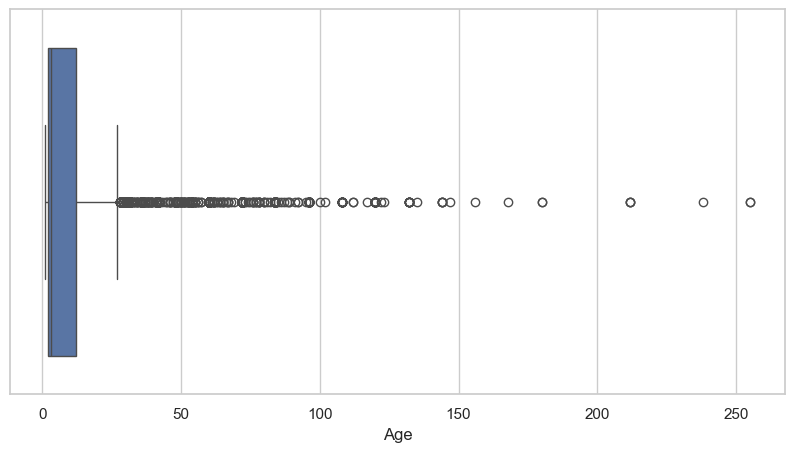

In [111]:

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Age', data=df_train, orient="h")

print(np.where(df_train['Age']>100))

(array([   81,   901,   953,  1459,  2038,  2078,  2247,  2519,  2913,
        3701,  4356,  4797,  4844,  5092,  5289,  5902,  6077,  6306,
        7315,  8590,  8722,  8834,  8879,  9003,  9393,  9707,  9745,
        9782,  9947, 10477, 10621, 10624, 10930, 11426, 11519, 11687,
       12304, 12365, 12582, 13121, 13631, 14245, 14454, 14519],
      dtype=int64),)


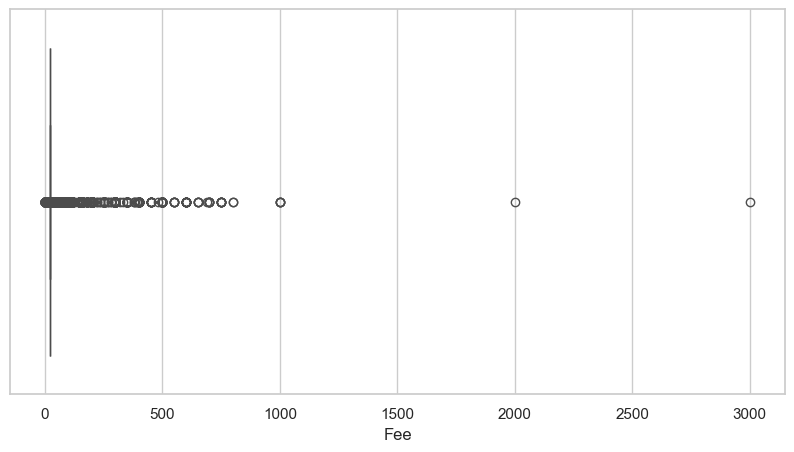

In [112]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Fee', data=df_train, orient="h")

print(np.where(df_train['Fee']>500))

(array([  263,   320,   396,   427,   823,  1088,  1302,  1305,  1377,
        1404,  1659,  2558,  2787,  2886,  3894,  4759,  5209,  5227,
        6091,  6291,  6332,  6997,  7094,  7847,  7875,  7966,  7993,
        8424,  8821,  9306,  9405,  9779,  9857,  9926, 11101, 11568,
       11729, 12792, 13383, 13596, 13599, 13865, 14583], dtype=int64),)


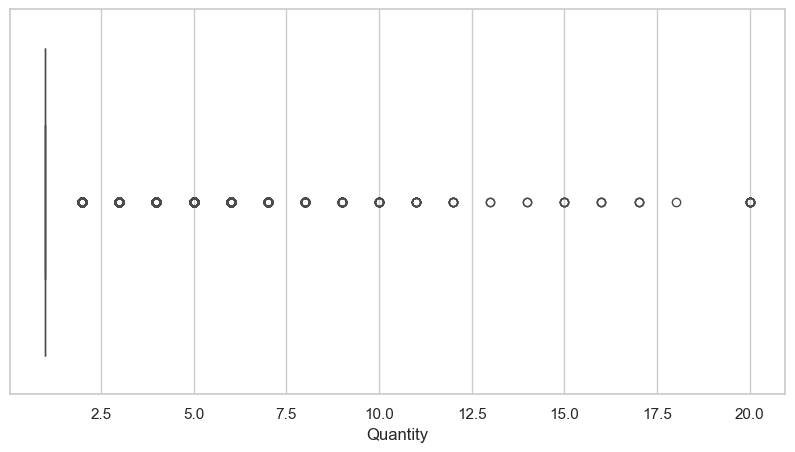

In [113]:

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='Quantity', data=df_train, orient="h")

print(np.where(df_train['Quantity']>10))

## **Data Preprocessing** 

*Data normalizarion, scaling and transformation

In [114]:

# Using standardization for scaling train data outliers

# For numeric columns
numeric_cols = ['Age', 'Fee', 'Quantity']

for column in numeric_cols:
  df_train[numeric_cols] = (df_train[numeric_cols] - df_train[numeric_cols].mean()) / df_train[numeric_cols].std()

df_train.tail(2)

Type     Name       Age  Breed1  Breed2  Gender  Color1  Color2  \
14991     2  Ms Daym -0.082032     266       0       2       4       7   
14992     1     Fili -0.523092     307     307       1       2       0   

       Color3  MaturitySize  ...  Health  Quantity       Fee  State  \
14991       0             1  ...       1 -0.391224 -0.243348  41336   
14992       0             2  ...       1 -0.391224 -0.243348  41332   

                              RescuerID  VideoAmt  \
14991  c311c0c569245baa147d91fa4e351ae4         0   
14992  9ed1d5493d223eaa5024c1a031dbc9c2         0   

                                             Description      PetID PhotoAmt  \
14991  she is very shy..adventures and independent..s...  e4da1c9e4      3.0   
14992  Fili just loves laying around and also loves b...  a83d95ead      1.0   

       AdoptionSpeed  
14991              4  
14992              3  

[2 rows x 24 columns]

In [115]:

# Using standardization for scaling test data outliers

# For numeric columns
for column in numeric_cols:
  df_test[numeric_cols] = (df_test[numeric_cols] - df_test[numeric_cols].mean()) / df_test[numeric_cols].std()

df_test.tail(2)

Type     Name       Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
3970     1   Smokey  0.725031     307       0       2       5       7       0   
3971     2  Unknown -0.591002     266       0       3       1       7       0   

      MaturitySize  ...  Sterilized  Health  Quantity      Fee  State  \
3970             2  ...           2       1 -0.397970 -0.25028  41325   
3971             1  ...           2       1  2.934107 -0.25028  41326   

                             RescuerID  VideoAmt  \
3970  087903c2819a6297519c93d962b488d5         0   
3971  041876679ae0261e3ee4aefe9e66316f         0   

                                            Description      PetID  PhotoAmt  
3970  smokey is good family pet. very obedient,so lo...  fd80b8c80       3.0  
3971  Found abandoned with the mother at nearby shop...  493ed84ae       1.0  

[2 rows x 23 columns]

* Exploring the correlation within features and the target variable:

- Upon analyzing the frequency counts for pet types (1 for 'Dog' and 2 for 'Cat') and Adoption Speed (target variable).

- The Adoption Speed is a categorical feature that represents the speed of adoption. For instance, lower is faster.

- We should use Chi-squared test for the association between each categorical variable and the target variable

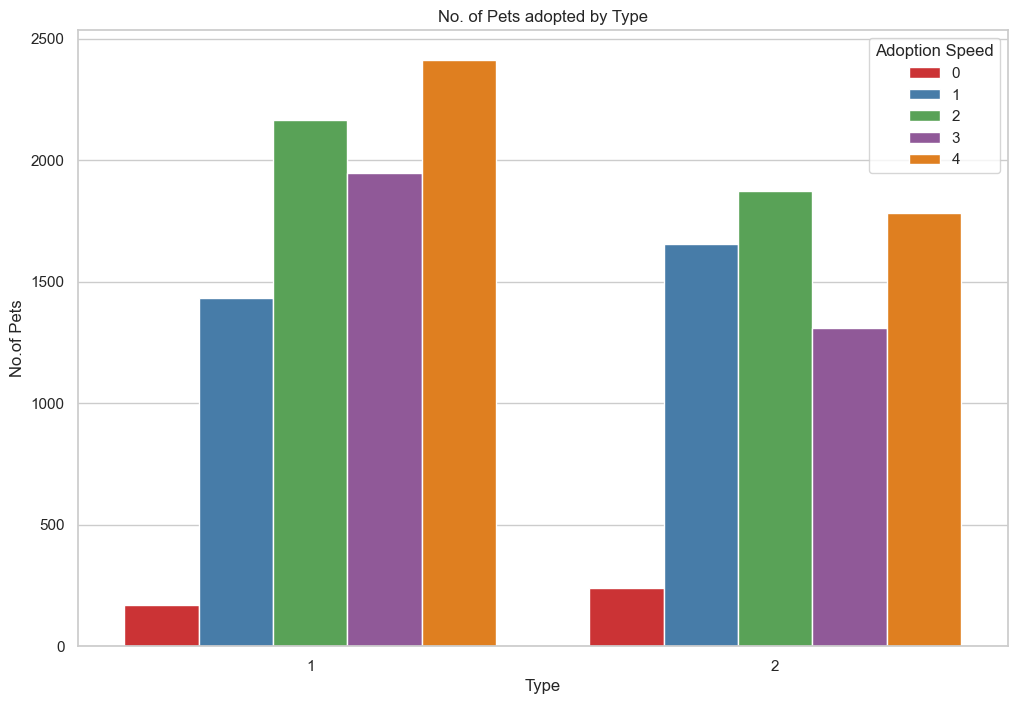

In [116]:

plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Type", hue = "AdoptionSpeed", palette = "Set1", data = df_train)
axis.set(title = "No. of Pets adopted by Type", xlabel = "Type",ylabel = "No.of Pets")
plt.legend(loc='upper right', title='Adoption Speed')
plt.show()

It's observed there are slightly more Dogs than Cats and the Cats are adopted a bit faster.

In [117]:
df_dogs = df_train[df_train['Type']==1]
df_dogs[['AdoptionSpeed', 'PetID']].groupby(['AdoptionSpeed'], as_index=False).count().sort_values(by='AdoptionSpeed', ascending=True)


AdoptionSpeed  PetID
0              0    170
1              1   1435
2              2   2164
3              3   1949
4              4   2414

In [118]:
df_cats = df_train[df_train['Type']==2]
df_cats[['AdoptionSpeed', 'PetID']].groupby(['AdoptionSpeed'], as_index=False).count().sort_values(by='AdoptionSpeed', ascending=True)


AdoptionSpeed  PetID
0              0    240
1              1   1655
2              2   1873
3              3   1310
4              4   1783

The following feature provides the gender of pet. It is coded as follows: 1 for 'Male', 2 for 'Female', and 3 for 'Mixed' when the profile represents a group of pets.

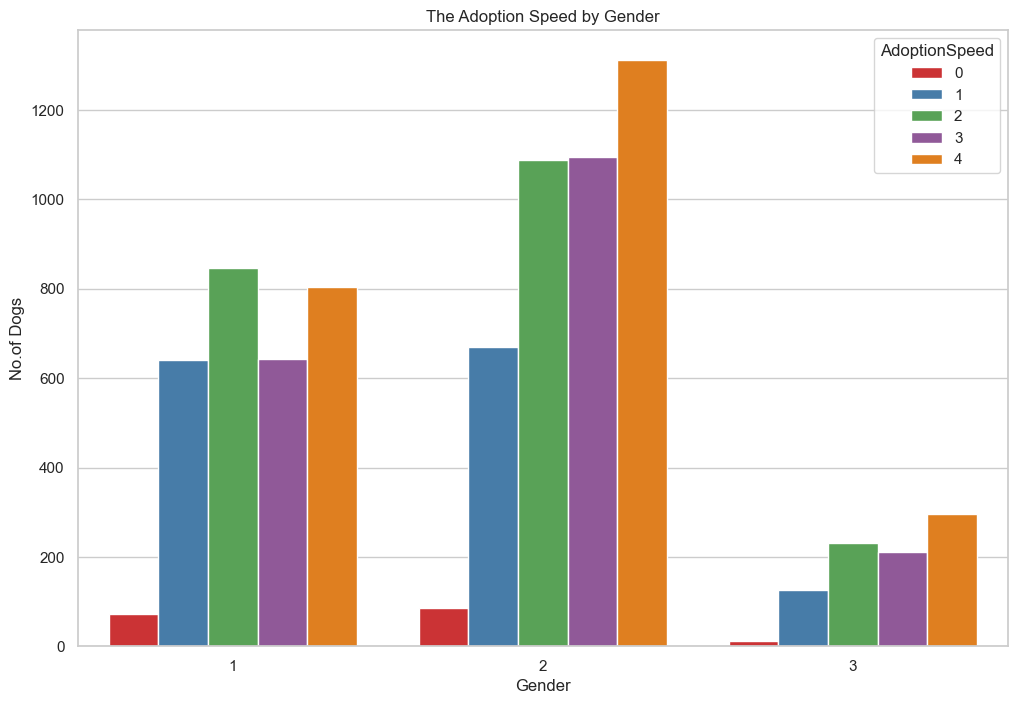

In [119]:

plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Gender", hue = "AdoptionSpeed", palette = "Set1", data = df_dogs )
axis.set(title = "The Adoption Speed by Gender", xlabel = "Gender",ylabel = "No.of Dogs")
plt.show()

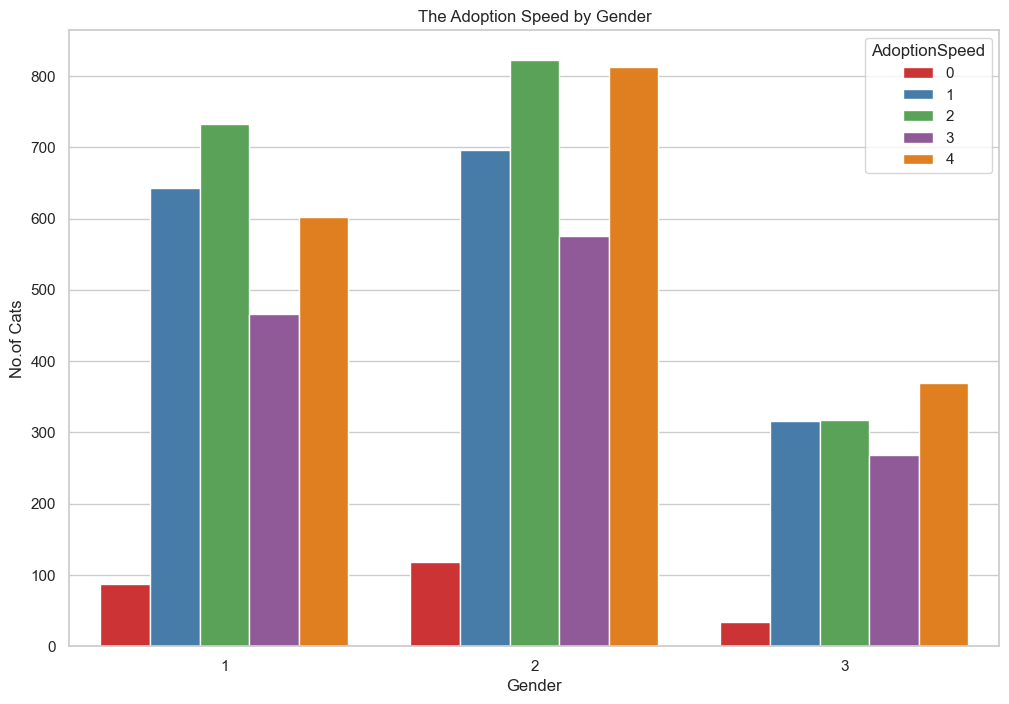

In [120]:

plt.figure(figsize=(12,8))
axis = sns.countplot(x = "Gender", hue = "AdoptionSpeed", palette = "Set1", data = df_cats )
axis.set(title = "The Adoption Speed by Gender", xlabel = "Gender",ylabel = "No.of Cats")
plt.show()

In [121]:

# Adding Gender labels
df_train['GenderName'] = df_train['Gender'].map({1:'Male', 2:'Female', 3:'Mixed'})

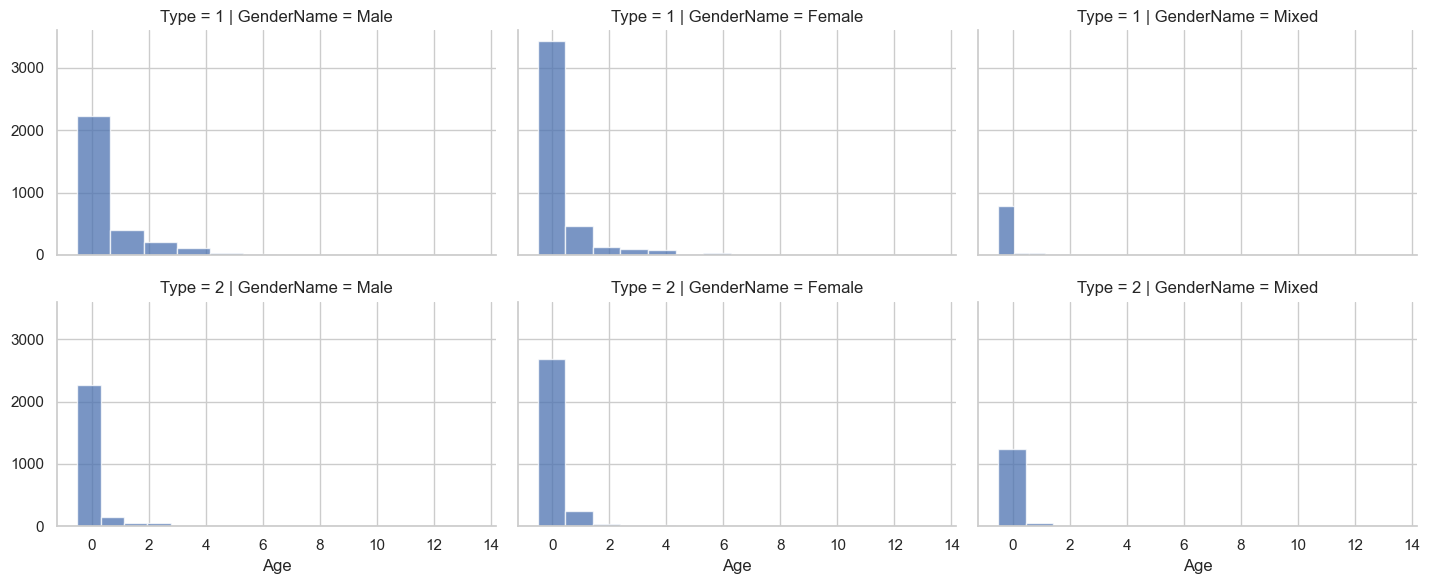

In [77]:
grid = sns.FacetGrid(df_train, col='GenderName',row='Type', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.75, bins=12)
grid.add_legend()

Examining the chart above, we can observe a broad distribution of age among female cats and dogs.

The pets exhibited a high distribution in age, indicating they were recently born.

It also indicates that pets with mixed genders had the lowest age distribution.

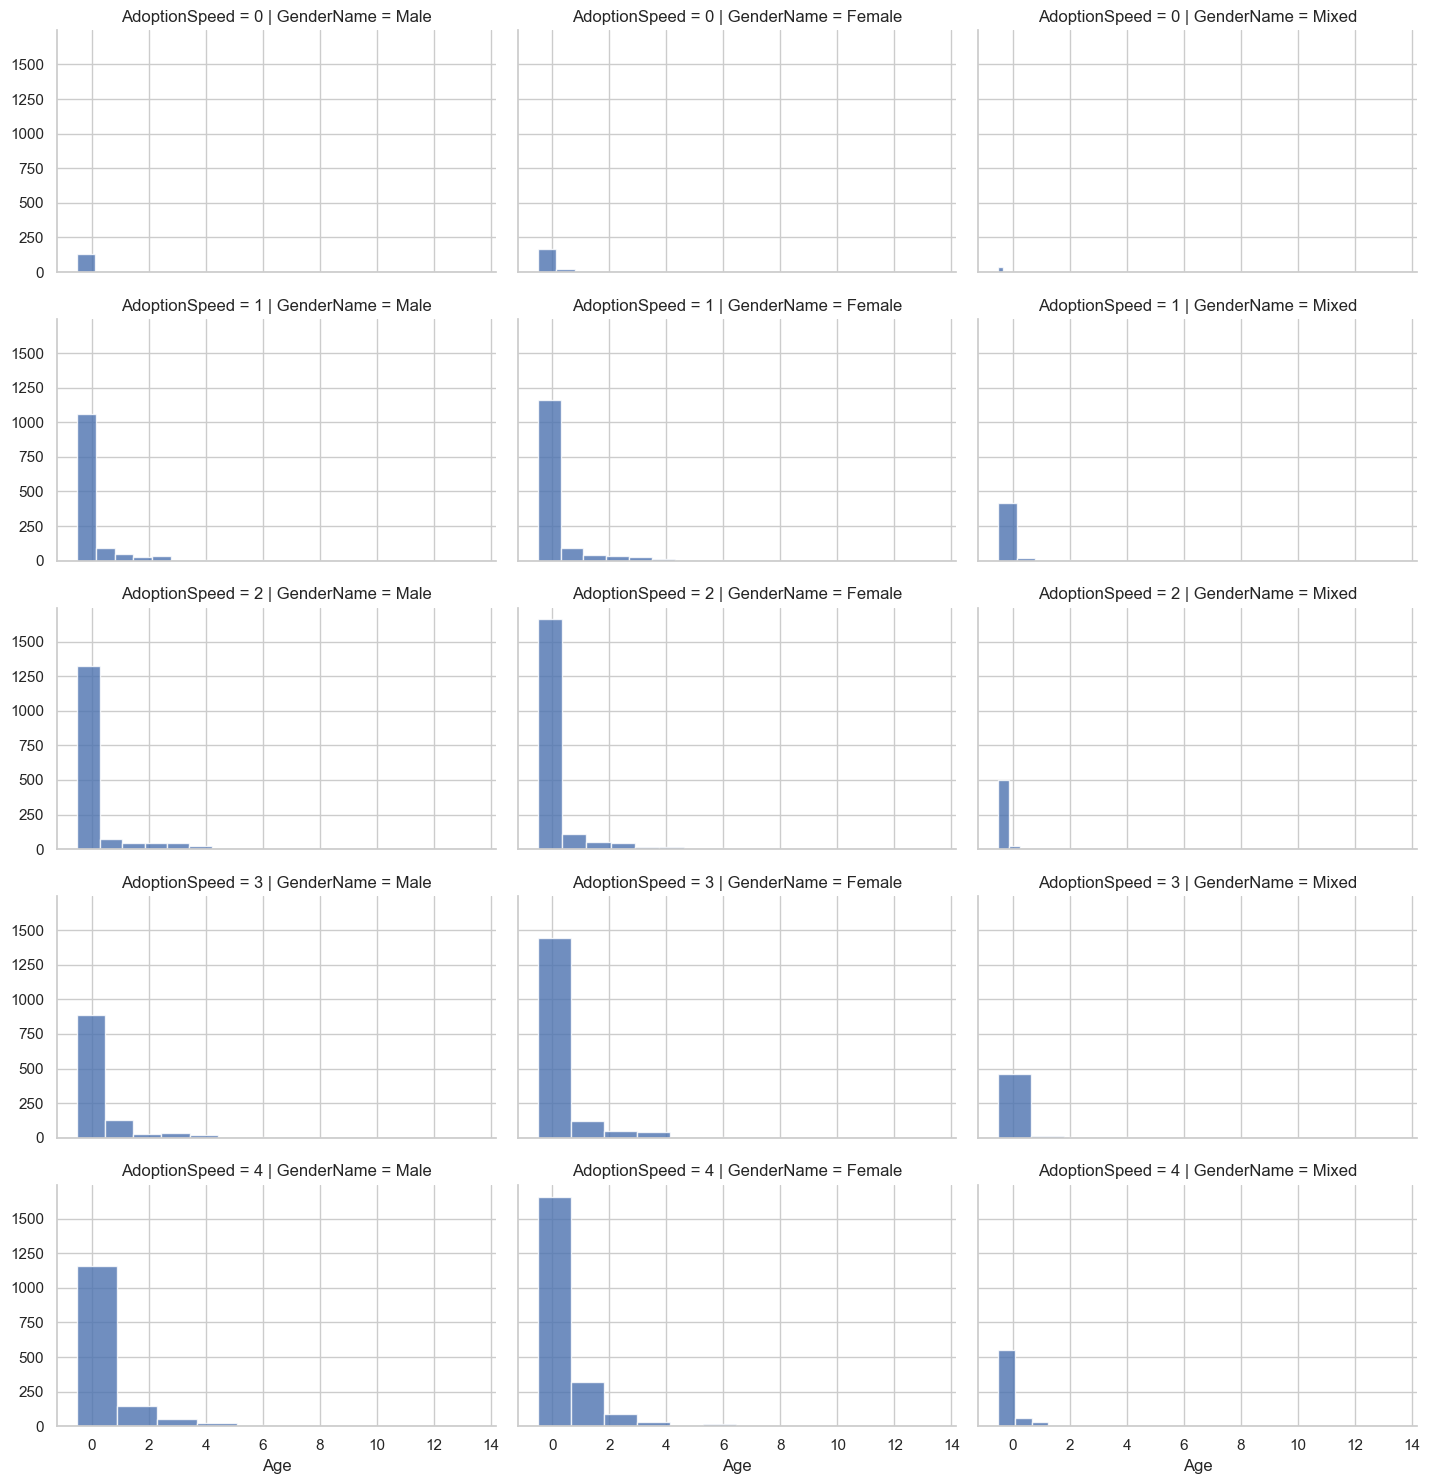

In [78]:

grid = sns.FacetGrid(df_train, col='GenderName',row='AdoptionSpeed', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.8, bins=10)
grid.add_legend()

In [79]:
numeric_cols = df_train.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
numeric_cols.corr()

Type       Age    Breed1    Breed2    Gender    Color1  \
Type           1.000000 -0.147038  0.057724 -0.043568  0.060843  0.097680   
Age           -0.147038  1.000000 -0.314597 -0.041049 -0.122215  0.089955   
Breed1         0.057724 -0.314597  1.000000 -0.157053  0.071321 -0.035510   
Breed2        -0.043568 -0.041049 -0.157053  1.000000  0.056907 -0.020324   
Gender         0.060843 -0.122215  0.071321  0.056907  1.000000 -0.115351   
Color1         0.097680  0.089955 -0.035510 -0.020324 -0.115351  1.000000   
Color2         0.246333 -0.039586 -0.007081  0.003015  0.026507 -0.113290   
Color3         0.201693 -0.052880 -0.000682  0.035679  0.259309 -0.282897   
MaturitySize  -0.171811  0.093094 -0.010507  0.049879 -0.091819 -0.029468   
FurLength      0.003036  0.152823 -0.108059  0.106220 -0.030404  0.066967   
Vaccinated     0.102907 -0.135151  0.046518  0.005638  0.078702 -0.017475   
Dewormed       0.025508 -0.051985  0.013216 -0.009817  0.091431 -0.019318   
Sterilized     0.006737 -0.188966  0.052698 -0.005989  0.040645 -0.037050   
Health        -0.006864  0.103728 -0.034893 -0.029285 -0.045177  0.024410   
Quantity       0.036423 -0.111202  0.090194  0.038125  0.494489 -0.116688   
Fee           -0.047583  0.089362 -0.190975  0.010657 -0.047893  0.050779   
State          0.124549  0.024514 -0.026832 -0.037993  0.002564  0.024012   
VideoAmt      -0.005967 -0.016085  0.020626  0.001569  0.016816 -0.006435   
PhotoAmt       0.049368 -0.084709  0.043395  0.045953  0.098435 -0.041323   
AdoptionSpeed -0.091240  0.100126  0.107834 -0.018642  0.057622 -0.044192   

                 Color2    Color3  MaturitySize  FurLength  Vaccinated  \
Type           0.246333  0.201693     -0.171811   0.003036    0.102907   
Age           -0.039586 -0.052880      0.093094   0.152823   -0.135151   
Breed1        -0.007081 -0.000682     -0.010507  -0.108059    0.046518   
Breed2         0.003015  0.035679      0.049879   0.106220    0.005638   
Gender         0.026507  0.259309     -0.091819  -0.030404    0.078702   
Color1        -0.113290 -0.282897     -0.029468   0.066967   -0.017475   
Color2         1.000000  0.088742     -0.065155  -0.008764    0.026193   
Color3         0.088742  1.000000     -0.051730   0.013581    0.054053   
MaturitySize  -0.065155 -0.051730      1.000000   0.095142   -0.087722   
FurLength     -0.008764  0.013581      0.095142   1.000000   -0.006010   
Vaccinated     0.026193  0.054053     -0.087722  -0.006010    1.000000   
Dewormed       0.005812  0.048617     -0.067352   0.016463    0.722596   
Sterilized     0.007370  0.038899     -0.066321   0.032092    0.471204   
Health        -0.004307 -0.024782     -0.012957   0.028096    0.078893   
Quantity       0.019876  0.272548     -0.042832  -0.038388    0.125287   
Fee           -0.018441 -0.020458      0.040549   0.158679   -0.117371   
State          0.026944  0.010554     -0.062584  -0.029317    0.032737   
VideoAmt       0.023983  0.019526      0.017032  -0.014740   -0.032685   
PhotoAmt       0.059113  0.103662      0.015593  -0.031557   -0.052719   
AdoptionSpeed -0.038579 -0.007014      0.045653  -0.091337   -0.059043   

               Dewormed  Sterilized    Health  Quantity       Fee     State  \
Type           0.025508    0.006737 -0.006864  0.036423 -0.047583  0.124549   
Age           -0.051985   -0.188966  0.103728 -0.111202  0.089362  0.024514   
Breed1         0.013216    0.052698 -0.034893  0.090194 -0.190975 -0.026832   
Breed2        -0.009817   -0.005989 -0.029285  0.038125  0.010657 -0.037993   
Gender         0.091431    0.040645 -0.045177  0.494489 -0.047893  0.002564   
Color1        -0.019318   -0.037050  0.024410 -0.116688  0.050779  0.024012   
Color2         0.005812    0.007370 -0.004307  0.019876 -0.018441  0.026944   
Color3         0.048617    0.038899 -0.024782  0.272548 -0.020458  0.010554   
MaturitySize  -0.067352   -0.066321 -0.012957 -0.042832  0.040549 -0.062584   
FurLength      0.016463    0.032092  0.028096 -0.038388 

In [80]:
# Compute the correlation between features and the target variable (e.g., 'AdoptionSpeed')
corr_to_target = numeric_cols.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)

# Display the top N features with the highest absolute correlation to the target variable
top_n = 19 # Change this number to display a different number of top features
top_features_to_target = corr_to_target[1:top_n]  # Exclude the target variable
print("Top", top_n, "features with highest correlation to the target:")
print(top_features_to_target)

Top 19 features with highest correlation to the target:
Breed1          0.107834
Age             0.100126
FurLength       0.091337
Type            0.091240
Sterilized      0.083447
Quantity        0.062931
Vaccinated      0.059043
Gender          0.057622
MaturitySize    0.045653
Color1          0.044192
Color2          0.038579
Health          0.029382
PhotoAmt        0.023233
Breed2          0.018642
Dewormed        0.013210
State           0.013119
Color3          0.007014
Fee             0.006288
Name: AdoptionSpeed, dtype: float64


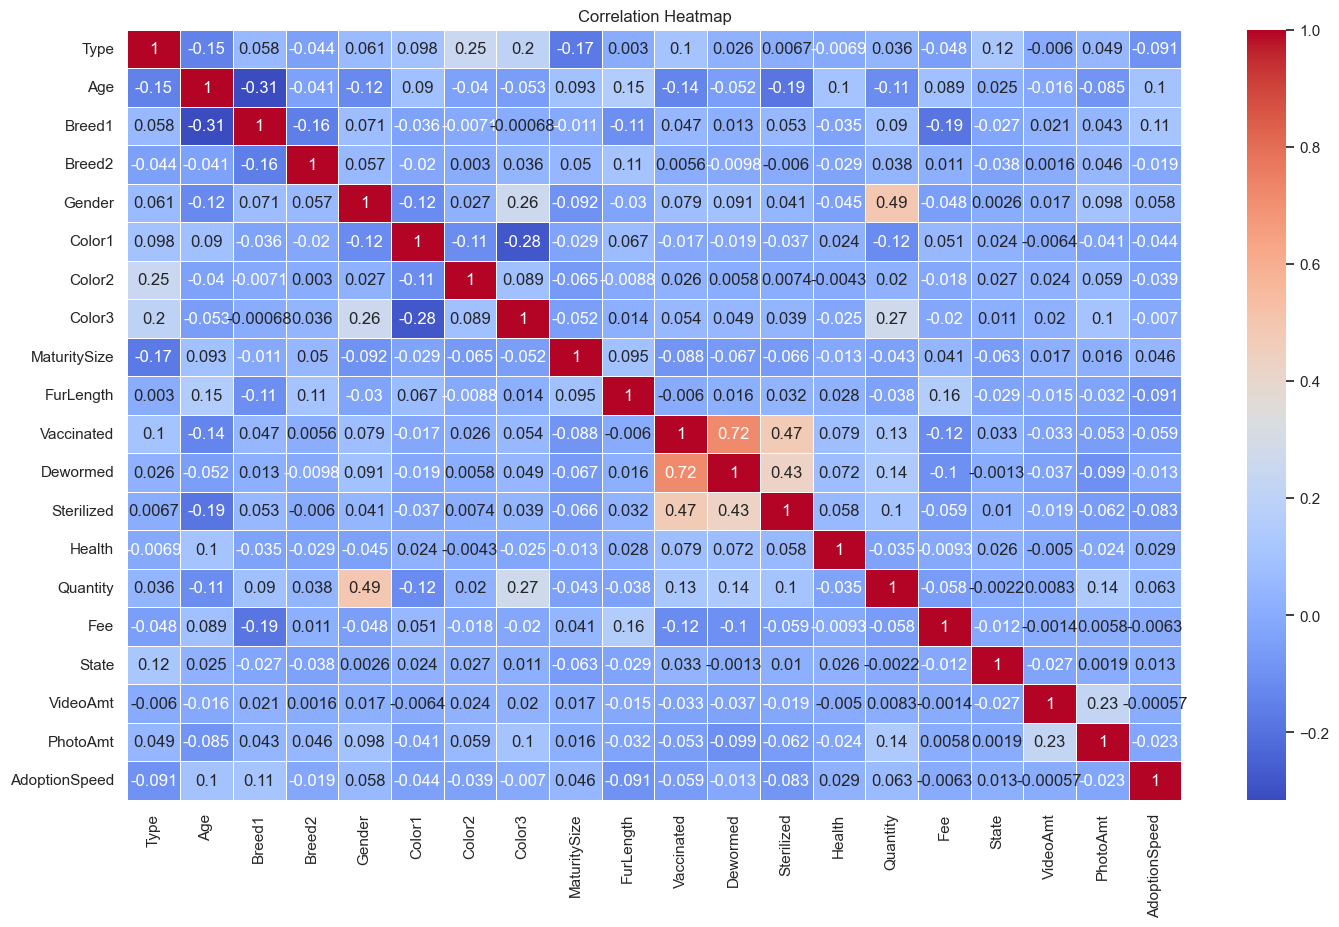

In [81]:

# Compute the correlation matrix between all features
correlation_matrix_1 = correlation_matrix.corr(method='spearman').round(2)

plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth = 0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [82]:

# Specify the correlation threshold as values greater than 0.4 or less than -0.4
correlation_threshold = 0.4  # We can adjust this value

# Create a mask to identify pairs of features with correlation exceeding the threshold
high_correlation_mask = (abs(correlation_matrix) > correlation_threshold) & (correlation_matrix != 1.0)

# Identify the indices (pairs) of highly correlated features
high_correlation_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) for j in range(i + 1, len(correlation_matrix.columns)) if high_correlation_mask.iloc[i, j]]

# Determine which feature to drop from each high-correlation pair
features_to_drop = []
for i, j in high_correlation_pairs:
    feature_i = correlation_matrix.columns[i]
    feature_j = correlation_matrix.columns[j]

    # Drop the feature with the higher index
    if i > j:
        features_to_drop.append(feature_i)
    else:
        features_to_drop.append(feature_j)

In [83]:

features_to_drop = set(features_to_drop)
features_to_drop


{'Dewormed', 'Quantity', 'Sterilized'}

## **Feature Engineering**

In [84]:
import os

**Tabular Data Features**

In [85]:
train_df = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\train\\train.csv')
test_df = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\test\\test.csv')
color_df = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\ColorLabels.csv')
breed_df = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\BreedLabels.csv')

In [86]:
output_dir = 'C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output'

In [87]:

train_df.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [88]:

# basic features : if its a mix of both breed, it will be 2 else 1.
train_df['num_breed'] = ((train_df['Breed1'] > 0) & (train_df['Breed2'] > 0)).astype(int) + ((train_df['Breed1'] > 0) | (train_df['Breed2'] > 0)).astype(int)
test_df['num_breed'] = ((test_df['Breed1'] > 0) & (test_df['Breed2'] > 0)).astype(int) + ((test_df['Breed1'] > 0) | (test_df['Breed2'] > 0)).astype(int)

In [89]:
# same with number of colors
color_columns = ['Color1', 'Color2', 'Color3']
train_df['num_colors'] = (train_df[color_columns] > 0).sum(axis=1)
test_df['num_colors'] = (test_df[color_columns] > 0).sum(axis=1)

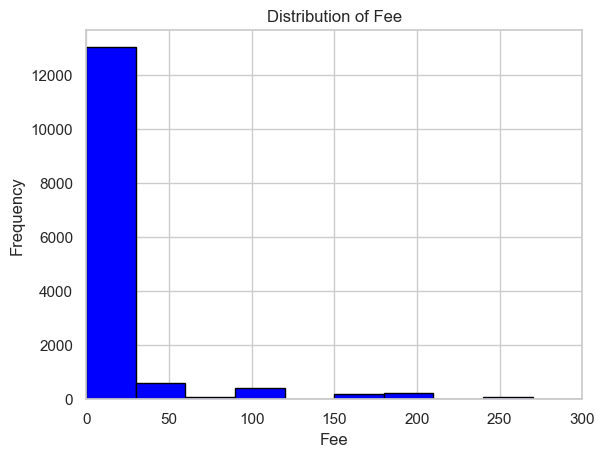

In [90]:
# lets do something with fee
import matplotlib.pyplot as plt
# distribution of fee
plt.hist(train_df['Fee'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Fee')
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.xlim(0,300)
plt.show()

In [91]:
# using vaccinated, dewormed, health and sterilized features
train_df['Total_Vaccinations'] = train_df[['Vaccinated', 'Dewormed', 'Sterilized']].sum(axis=1)
test_df['Total_Vaccinations'] = test_df[['Vaccinated', 'Dewormed', 'Sterilized']].sum(axis=1)

train_df['Avg_Health_Score'] = train_df[['Health']].mean(axis=1)
test_df['Avg_Health_Score'] = test_df[['Health']].mean(axis=1)

In [92]:
# feature using fur length and health

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# creating interaction feature
train_df['Fur_Health_Interact'] = train_df['FurLength'].astype(str) + '_' + train_df['Health'].astype(str)
# Fit and transform the column
train_df['Fur_Health_Interact_Encoded'] = label_encoder.fit_transform(train_df['Fur_Health_Interact'])

test_df['Fur_Health_Interact'] = test_df['FurLength'].astype(str) + '_' + test_df['Health'].astype(str)
# Fit and transform the column
test_df['Fur_Health_Interact_Encoded'] = label_encoder.fit_transform(test_df['Fur_Health_Interact'])

In [93]:
# feature using health
def feature_eng_health_vaccinated(df):

    conditions = [
        (df['Health'] == 1) & (df['Total_Vaccinations'] == 0),
        (df['Health'] == 1) & (df['Total_Vaccinations'] > 0),
        (df['Health'].isin([2, 3]))
    ]
    choices = ['Healthy and Unvaccinated', 'Healthy and Vaccinated', 'Injured or Sick']
    df['Overall_Health_Status'] = np.select(conditions, choices, default='Not Specified')
    df['Overall_Health_Status_Encoded'] = label_encoder.fit_transform(df['Overall_Health_Status'])

    return df

train_df = feature_eng_health_vaccinated(train_df)
test_df = feature_eng_health_vaccinated(test_df)


In [94]:
# arranging the column order
new_column_order = ['PetID'] + [col for col in train_df.columns if col != 'PetID' and col != 'AdoptionSpeed'] + ['AdoptionSpeed']
train_df_new_order = train_df[new_column_order]


In [95]:
if 'AdoptionSpeed' in test_df.columns:
    new_column_order = ['PetID'] + [col for col in test_df.columns if col != 'PetID' and col != 'AdoptionSpeed'] + ['AdoptionSpeed']
    test_df = test_df[new_column_order]
else:
    new_column_order = ['PetID'] + [col for col in test_df.columns if col != 'PetID']
    test_df = test_df[new_column_order]

In [96]:
test_df.shape

(3972, 31)

In [97]:
# saving the files
train_df_new_order.to_csv(os.path.join(output_dir, 'train_df_mahmood_features.csv'), index=False)
test_df.to_csv(os.path.join(output_dir, 'test_df_mahmood_features.csv'), index=False)

**Sentiment Data**

In [142]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [98]:
file_path = 'C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\train\\train.csv'
file_path_test = 'C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\test\\test.csv'

In [99]:
data = pd.read_csv(file_path)

In [53]:
data.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [123]:
data_test = pd.read_csv(file_path_test)

In [124]:
data_test.head()

Type                       Name  Age  Breed1  Breed2  Gender  Color1  \
0     2               Dopey & Grey    8     266     266       1       2   
1     2                    Chi Chi   36     285     264       2       1   
2     2                     Sticky    2     265       0       1       6   
3     1  Dannie & Kass [In Penang]   12     307       0       2       2   
4     2                    Cuddles   12     265       0       1       2   

   Color2  Color3  MaturitySize  ...  Sterilized  Health  Quantity  Fee  \
0       6       7             1  ...           2       1         2    0   
1       4       7             2  ...           1       2         1    0   
2       7       0             2  ...           2       1         1  200   
3       5       0             2  ...           1       1         2    0   
4       3       7             2  ...           1       1         1    0   

   State                         RescuerID  VideoAmt  \
0  41326  2ece3b2573dcdcebd774e635dca15fd9         0   
1  41326  2ece3b2573dcdcebd774e635dca15fd9         0   
2  41326  e59c106e9912fa30c898976278c2e834         0   
3  41326  e59c106e9912fa30c898976278c2e834         0   
4  41326  e59c106e9912fa30c898976278c2e834         0   

                                         Description      PetID  PhotoAmt  
0  Dopey Age: 8mths old Male One half of a pair, ...  e2dfc2935       2.0  
1  Please note that Chichi has been neutered, the...  f153b465f       1.0  
2  Sticky, named such because of his tendency to ...  3c90f3f54       4.0  
3  Dannie and Kass are mother and daughter. We en...  e02abc8a3       5.0  
4  Extremely cuddly cat, hence the origin of his ...  09f0df7d1       5.0  

[5 rows x 23 columns]

In [125]:
data['Description'] = data['Description'].astype(str).fillna("No description")

In [126]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\leoko\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [127]:
sia = SentimentIntensityAnalyzer()

In [128]:
data['Description'] = data['Description'].astype(str).fillna("No description")

In [129]:
data['Description'] = data['Description'].astype(str).fillna('')

In [130]:
data['sentiments'] = data['Description'].apply(lambda x: sia.polarity_scores(x))

In [131]:
data['compound'] = data['sentiments'].apply(lambda x: x['compound'])

In [132]:
print(data[['Description', 'compound']].head())

                                         Description  compound
0  Nibble is a 3+ month old ball of cuteness. He ...    0.9552
1  I just found it alone yesterday near my apartm...    0.1280
2  Their pregnant mother was dumped by her irresp...    0.7650
3  Good guard dog, very alert, active, obedience ...    0.9538
4  This handsome yet cute boy is up for adoption....    0.9880


In [133]:
data_test['Description'] = data_test['Description'].astype(str).fillna("No description")

In [134]:
data_test['Description'] = data_test['Description'].astype(str).fillna('')

In [135]:
data_test['sentiments'] = data_test['Description'].apply(lambda x: sia.polarity_scores(x))

In [136]:
data_test['compound'] = data_test['sentiments'].apply(lambda x: x['compound'])

In [137]:
print(data_test[['Description', 'compound']].head())

                                         Description  compound
0  Dopey Age: 8mths old Male One half of a pair, ...    0.9696
1  Please note that Chichi has been neutered, the...    0.9446
2  Sticky, named such because of his tendency to ...    0.9758
3  Dannie and Kass are mother and daughter. We en...    0.9792
4  Extremely cuddly cat, hence the origin of his ...    0.8809


In [138]:
train_file_path = 'C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\train\\train.csv'
test_file_path = 'C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\test\\test.csv'

In [139]:
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [140]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [143]:
train['polarity'] = train['Description'].astype(str).apply(get_polarity)
train['subjectivity'] = train['Description'].astype(str).apply(get_subjectivity)

test['polarity'] = test['Description'].astype(str).apply(get_polarity)
test['subjectivity'] = test['Description'].astype(str).apply(get_subjectivity)

In [144]:
print(train[['Description', 'polarity', 'subjectivity']].head())
print(test[['Description', 'polarity', 'subjectivity']].head())

                                         Description  polarity  subjectivity
0  Nibble is a 3+ month old ball of cuteness. He ...  0.130357      0.407143
1  I just found it alone yesterday near my apartm...  0.100000      0.400000
2  Their pregnant mother was dumped by her irresp...  0.261905      0.542857
3  Good guard dog, very alert, active, obedience ...  0.341146      0.437500
4  This handsome yet cute boy is up for adoption....  0.400000      0.743750
                                         Description  polarity  subjectivity
0  Dopey Age: 8mths old Male One half of a pair, ...  0.035937      0.230729
1  Please note that Chichi has been neutered, the...  0.054464      0.167445
2  Sticky, named such because of his tendency to ...  0.317857      0.678571
3  Dannie and Kass are mother and daughter. We en...  0.347865      0.603333
4  Extremely cuddly cat, hence the origin of his ...  0.142347      0.657143


In [145]:
# saving the files
train.to_csv(os.path.join(output_dir, 'processed_train.csv'), index=False)
test.to_csv(os.path.join(output_dir, 'processed_test.csv'), index=False)

**Image Features**

We are extracting Texture Features and Local Features here. Below are some information about those features :

Haralick Texture Features: These include energy, contrast, correlation, and entropy, which describe the texture of an image.

Local Features:SIFT (Scale-Invariant Feature Transform) and SURF (Speeded-Up Robust Features): Detect and describe distinctive local features in images.

In [146]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
import json
import cv2
import numpy as np
import skimage.feature as skf
import skimage.filters as skg
from skimage.measure import shannon_entropy
from scipy.stats import entropy
from sklearn.cluster import KMeans

Extracting texture features

In [147]:
def extract_texture_features(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    haralick = skf.graycomatrix(img_gray, [1], [0], 256, symmetric=True, normed=True)
    energy = skf.graycoprops(haralick, 'energy')[0, 0]
    contrast = skf.graycoprops(haralick, 'contrast')[0, 0]
    correlation = skf.graycoprops(haralick, 'correlation')[0, 0]
    entropy = shannon_entropy(img_gray)

    mean = np.mean(img)
    std_dev = np.std(img)

    return energy, contrast, correlation, entropy, mean, std_dev

test_img_path = 'C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\test_images'
train_img_path = 'C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\train_images'


# looping through the training images
# Create an empty dataframe
df_train_img = pd.DataFrame(columns=['PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean', 'Std_Dev'])

# Loop through each image in the folder
for filename in os.listdir(train_img_path):
    if filename.endswith('.jpg'):
        # Extract the texture features
        energy, contrast, correlation, entropy, mean, std_dev = extract_texture_features(os.path.join(train_img_path, filename))

        # Add the features to the dataframe
        df_train_img = pd.concat([df_train_img, pd.DataFrame({'PetID': [filename[:-4]], 'Energy': [energy], 'Contrast': [contrast], 'Correlation': [correlation], 'Entropy': [entropy], 'Mean': [mean], 'Std_Dev': [std_dev]})])

#df_train_img.to_csv('df_train_img_texture.csv')
# saving the files
df_train_img.to_csv(os.path.join(output_dir, 'df_train_img_texture.csv'), index=False)


# looping through the testing images
# Create an empty dataframe
df_test_img = pd.DataFrame(columns=['PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean', 'Std_Dev'])

# Loop through each image in the folder
for filename in os.listdir(test_img_path):
    if filename.endswith('.jpg'):
        # Extract the texture features
        energy, contrast, correlation, entropy, mean, std_dev = extract_texture_features(os.path.join(test_img_path, filename))

        # Add the features to the dataframe
        df_test_img = pd.concat([df_test_img, pd.DataFrame({'PetID': [filename[:-4]], 'Energy': [energy], 'Contrast': [contrast], 'Correlation': [correlation], 'Entropy': [entropy], 'Mean': [mean], 'Std_Dev': [std_dev]})])

df_test_img.to_csv(os.path.join(output_dir, 'df_test_img_texture.csv'), index=False)

C:\Users\leoko\AppData\Local\Temp\ipykernel_7904\2979515395.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_train_img = pd.concat([df_train_img, pd.DataFrame({'PetID': [filename[:-4]], 'Energy': [energy], 'Contrast': [contrast], 'Correlation': [correlation], 'Entropy': [entropy], 'Mean': [mean], 'Std_Dev': [std_dev]})])
C:\Users\leoko\AppData\Local\Temp\ipykernel_7904\2979515395.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_test_img = pd.concat([df_test_img, pd.DataFrame({'PetI

Extracting Local Features

In [149]:
def extract_keypoints(file_path):
    # Load an image
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect and compute SIFT keypoints and descriptors
    keypoints, _ = sift.detectAndCompute(image, None)

    # Return the number of keypoints
    return len(keypoints)


df_train_img['num_checkpoints'] = None  # Initialize the column

def extract_and_update(row):
    file_path = os.path.join(train_img_path, f"{row['PetID']}.jpg")
    num_keypoints = extract_keypoints(file_path)
    return num_keypoints


# Update the 'num_checkpoints' column
df_train_img['num_checkpoints'] = df_train_img.apply(extract_and_update, axis=1)
df_train_img.to_csv('train_img_keypoints.csv')



# Assuming df is your DataFrame
df_test_img['num_checkpoints'] = None  # Initialize the column

def extract_and_update(row):
    file_path = os.path.join(test_img_path, f"{row['PetID']}.jpg")
    num_keypoints = extract_keypoints(file_path)
    return num_keypoints


# Update the 'num_checkpoints' column
df_test_img['num_checkpoints'] = df_test_img.apply(extract_and_update, axis=1)
df_test_img.to_csv(os.path.join(output_dir, 'test_img_keypoints.csv'), index=False)

In [150]:
df_train_img.to_csv(os.path.join(output_dir, 'train_img_keypoints.csv'), index=False)

Combining the current image feature dataframes first

In [151]:
train_texture = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\df_train_img_texture.csv')
test_texture = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\df_test_img_texture.csv')
train_keypoints =  pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\train_img_keypoints.csv')
test_keypoints = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\test_img_keypoints.csv')

In [152]:
test_texture.shape

(14465, 7)

In [153]:
train_texture.columns

Index(['PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean',
       'Std_Dev'],
      dtype='object')

In [154]:
train_keypoints.columns

Index(['PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean',
       'Std_Dev', 'num_checkpoints'],
      dtype='object')

In [155]:
final_keypoints = pd.concat([train_keypoints, test_keypoints], ignore_index=True, sort=False)
final_keypoints.head()

PetID    Energy    Contrast  Correlation   Entropy        Mean  \
0  0008c5398-1  0.024081   78.820303     0.989859  7.601080  143.223922   
1  0008c5398-2  0.070913   41.355089     0.994805  7.284530   91.658592   
2  0008c5398-3  0.040957   66.469614     0.989986  7.594550  111.068160   
3  0008c5398-4  0.050778  150.613044     0.984973  7.517500  108.980235   
4  0008c5398-5  0.025575   79.317245     0.992683  7.719211  141.169160   

     Std_Dev  num_checkpoints  
0  70.638848              319  
1  64.059420              233  
2  73.856578              410  
3  71.533391              469  
4  76.906123              395

In [156]:
# Columns to drop
columns_to_drop = ['mean_h', 'mean_s', 'mean_v', 'variance_h', 'variance_s', 'variance_v', 'Unnamed: 0']

# Drop specified columns
final_keypoints = final_keypoints.drop(columns=columns_to_drop, errors='ignore')

# Print the resulting DataFrame
final_keypoints.head()

PetID    Energy    Contrast  Correlation   Entropy        Mean  \
0  0008c5398-1  0.024081   78.820303     0.989859  7.601080  143.223922   
1  0008c5398-2  0.070913   41.355089     0.994805  7.284530   91.658592   
2  0008c5398-3  0.040957   66.469614     0.989986  7.594550  111.068160   
3  0008c5398-4  0.050778  150.613044     0.984973  7.517500  108.980235   
4  0008c5398-5  0.025575   79.317245     0.992683  7.719211  141.169160   

     Std_Dev  num_checkpoints  
0  70.638848              319  
1  64.059420              233  
2  73.856578              410  
3  71.533391              469  
4  76.906123              395

In [157]:
#final_keypoints.to_csv('image_features.csv')
final_keypoints.to_csv(os.path.join(output_dir, 'image_features.csv'), index=False)

**Generating Preliminary Features CSV**

In [163]:
df_image = pd.read_csv("C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\image_features.csv", header = 0)

In [164]:
df_train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'GenderName', 'Breed1AgeFurLength', 'VDSCombination', 'ColorCount',
       'TotalVisualMedia', 'DescriptionLength', 'SentimentScore'],
      dtype='object')

In [165]:
# Adding features engineering for train dataset

# Concatenating Breed1, Age and Furlength features
df_train['Breed1AgeFurLength'] = (df_train['Breed1'].astype(str) + np.abs(df_train['Age']).astype(str) + df_train['FurLength'].astype(str)).astype(float)

# Concatenating binary features such as Vaccinated, Dewormed and Sterilized
df_train['VDSCombination'] = (df_train['Vaccinated'].astype(str) + df_train['Dewormed'].astype(str) + df_train['Sterilized'].astype(str)).astype(float)

# Creating a color count feature without including cases where any color is 0
df_train['ColorCount'] = df_train[['Color1', 'Color2', 'Color3']].apply(lambda row: len([color for color in row if color != 0]), axis=1)

# Creating a total visual media feature
df_train['TotalVisualMedia'] = df_train['PhotoAmt'] + df_train['VideoAmt']

# Creating a description length feature
df_train['DescriptionLength'] = df_train['Description'].apply(lambda x: len(str(x)))

# Creating a sentiment score feature
from textblob import TextBlob
df_train['SentimentScore'] = df_train['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [166]:
# Adding features engineering for test dataset

# Concatenating Breed1, Age and Furlength features
df_test['Breed1AgeFurLength'] = (df_test['Breed1'].astype(str) + np.abs(df_test['Age']).astype(str) + df_test['FurLength'].astype(str)).astype(float)

# Concatenating binary features such as Vaccinated, Dewormed and Sterilized
df_test['VDSCombination'] = (df_test['Vaccinated'].astype(str) + df_test['Dewormed'].astype(str) + df_test['Sterilized'].astype(str)).astype(float)

# Creating a color count feature without including cases where any color is 0
df_test['ColorCount'] = df_test[['Color1', 'Color2', 'Color3']].apply(lambda row: len([color for color in row if color != 0]), axis=1)

# Creating a total visual media feature
df_test['TotalVisualMedia'] = df_test['PhotoAmt'] + df_test['VideoAmt']

# Creating a description length feature
df_test['DescriptionLength'] = df_test['Description'].apply(lambda x: len(str(x)))

# Creating a sentiment score feature
from textblob import TextBlob
df_test['SentimentScore'] = df_test['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [167]:
# Adding image features to dataset

# First finding the position of '-' in PetID
df_image['pos'] = df_image['PetID'].str.find('-')
#df_image.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

# Using position to slice PetID using a lambda function
df_image['PetID'] = df_image.apply(lambda x: x['PetID'][0:x['pos']],axis=1)
df_image.drop(columns=['pos'], axis=1, inplace=True)

df_train = pd.merge(df_train, df_image, how="inner", on=["PetID"], copy=True)

In [168]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58311 entries, 0 to 58310
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Type                58311 non-null  int64  
 1   Name                58311 non-null  object 
 2   Age                 58311 non-null  float64
 3   Breed1              58311 non-null  int64  
 4   Breed2              58311 non-null  int64  
 5   Gender              58311 non-null  int64  
 6   Color1              58311 non-null  int64  
 7   Color2              58311 non-null  int64  
 8   Color3              58311 non-null  int64  
 9   MaturitySize        58311 non-null  int64  
 10  FurLength           58311 non-null  int64  
 11  Vaccinated          58311 non-null  int64  
 12  Dewormed            58311 non-null  int64  
 13  Sterilized          58311 non-null  int64  
 14  Health              58311 non-null  int64  
 15  Quantity            58311 non-null  float64
 16  Fee 

In [169]:
numeric_cols = df_train.select_dtypes(include=[np.number])
correlation_m = numeric_cols.corr()

In [170]:
# Compute the correlation between features and the target variable (e.g., 'AdoptionSpeed')
corr_to_target = numeric_cols.corr()['AdoptionSpeed'].abs().sort_values(ascending=False)

# Display the top N features with the highest absolute correlation to the target
top_n = 16 # Change this number to display a different number of top features
top_features_to_target = corr_to_target[1:top_n]  # Exclude the target variable
print("Top", top_n, "features with highest correlation to the target:")
print(top_features_to_target)

Top 16 features with highest correlation to the target:
Sterilized            0.142998
Age                   0.114441
Vaccinated            0.112167
Type                  0.112119
VDSCombination        0.111070
FurLength             0.097280
Breed1                0.092313
num_checkpoints       0.085741
Contrast              0.085530
Correlation           0.085019
Breed1AgeFurLength    0.078735
Quantity              0.063614
Dewormed              0.062410
MaturitySize          0.057874
Gender                0.052376
Name: AdoptionSpeed, dtype: float64


In [171]:
# Columns to add

# Columns to drop (To be analyze)
# df_train.drop(columns=['Breed1', 'Dewormed', 'Quantity', 'Sterilized'], inplace=True)

# Dropping label GenderName
df_train.drop('GenderName', axis=1, inplace=True)

# Print the resulting DataFrame
df_train.head()

# Save the resulting in a csv file
df_train.to_csv(os.path.join(output_dir, 'preliminary_features.csv'), index=False)

**Making new features and data transformations**

In [172]:
#Loading dataset for making new features

#Prelimary data
df_prey = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\preliminary_features.csv', header=0)

#Image data
df_imgs = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\image_features.csv', header=0)
df_imgs = df_imgs[['PetID', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints']]

#Feature engineering on tabular data
df_tabr = pd.read_csv('C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\train_df_mahmood_features.csv')
df_tabr = df_tabr[['PetID', 'num_breed', 'num_colors', 'Total_Vaccinations', 'Avg_Health_Score', 'Fur_Health_Interact', 'Fur_Health_Interact_Encoded', 'Overall_Health_Status', 'Overall_Health_Status_Encoded']]

#Sentiment data
df_sent = pd.read_csv( 'C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\processed_train.csv', header=0)
df_sent = df_sent[['PetID', 'polarity', 'subjectivity']]

#Displaying first 5 rows
df_petf = pd.merge(df_prey, df_sent, how="inner", on=["PetID"], copy=True)
df_petf = pd.merge(df_petf, df_tabr, how="inner", on=["PetID"], copy=True)
df_petf.describe().T

count          mean         std  \
Type                           58311.0      1.479669    0.499591   
Age                            58311.0     -0.075961    0.911200   
Breed1                         58311.0    267.609628   56.913768   
Breed2                         58311.0     79.078784  125.182464   
Gender                         58311.0      1.836326    0.713444   
Color1                         58311.0      2.169505    1.701183   
Color2                         58311.0      3.368215    2.687411   
Color3                         58311.0      2.159404    3.099248   
MaturitySize                   58311.0      1.869664    0.536435   
FurLength                      58311.0      1.450532    0.588856   
Vaccinated                     58311.0      1.699645    0.640694   
Dewormed                       58311.0      1.496939    0.659212   
Sterilized                     58311.0      1.882715    0.542593   
Health                         58311.0      1.032327    0.189597   
Quantity                       58311.0      0.123604    1.144796   
Fee                            58311.0      0.005178    1.009167   
State                          58311.0  41346.082849   32.568108   
VideoAmt                       58311.0      0.127300    0.595185   
PhotoAmt                       58311.0      7.016841    5.795156   
AdoptionSpeed                  58311.0      2.491914    1.123897   
Breed1AgeFurLength             58311.0   2690.344570  826.376396   
VDSCombination                 58311.0    186.816604   69.105185   
ColorCount                     58311.0      2.077087    0.767663   
TotalVisualMedia               58311.0      7.144141    5.985989   
DescriptionLength              58311.0    434.146559  479.781642   
SentimentScore                 58311.0      0.199407    0.170476   
Energy                         58311.0      0.034879    0.040149   
Contrast                       58311.0    199.383999  240.076671   
Correlation                    58311.0      0.968525    0.038533   
Entropy                        58311.0      7.391165    0.405306   
Mean                           58311.0    117.984377   27.888895   
Std_Dev                        58311.0     59.752222   12.851703   
num_checkpoints                58311.0    668.592976  580.219031   
polarity                       58311.0      0.199458    0.170401   
subjectivity                   58311.0      0.505724    0.197572   
num_breed                      58311.0      1.303528    0.459785   
num_colors                     58311.0      2.077087    0.767663   
Total_Vaccinations             58311.0      5.079299    1.535524   
Avg_Health_Score               58311.0      1.032327    0.189597   
Fur_Health_Interact_Encoded    58311.0      1.383924    1.780581   
Overall_Health_Status_Encoded  58311.0      0.029994    0.170573   

                                        min           25%           50%  \
Type                               1.000000      1.000000      1.000000   
Age                               -0.523092     -0.467960     -0.412827   
Breed1                             0.000000    265.000000    266.000000   
Breed2                             0.000000      0.000000      0.000000   
Gender                             1.000000      1.000000      2.000000   
Color1                             1.000000      1.000000      1.000000   
Color2                             0.000000      0.000000      3.000000   
Color3                             0.000000      0.000000      0.000000   
MaturitySize                       1.000000      2.000000      2.000000   
FurLength                          1.000000      1.000000      1.000000   
Vaccinated                         1.000000      1.000000      2.000000   
Dewormed                           1.000000      1.000000      1.000000   
Sterilized                         1.000000      2.000000      2.000000   
Health                             1.000000      1.000000      1.000000   
Quantity                          -0.391224     -0.

**Univariate Analysis for Outliers Detection**

Age
Skew : 4.32


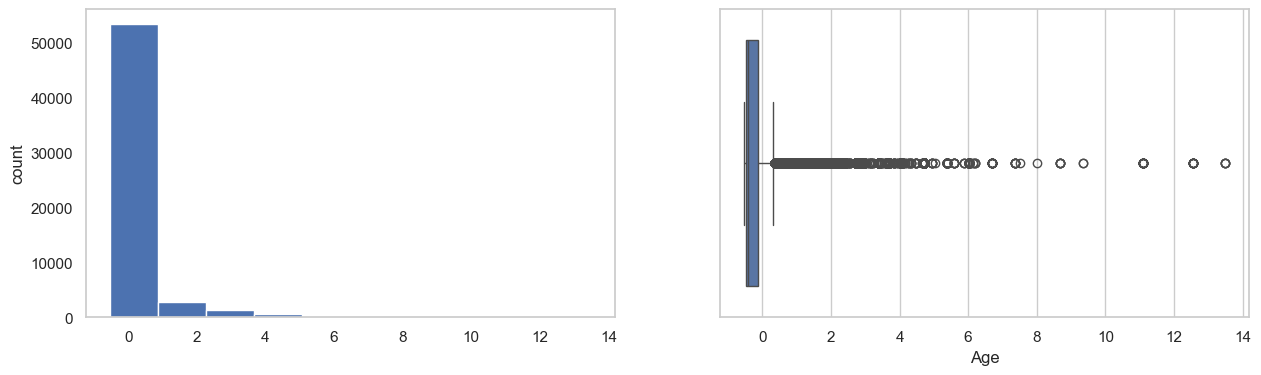

Fee
Skew : 10.58


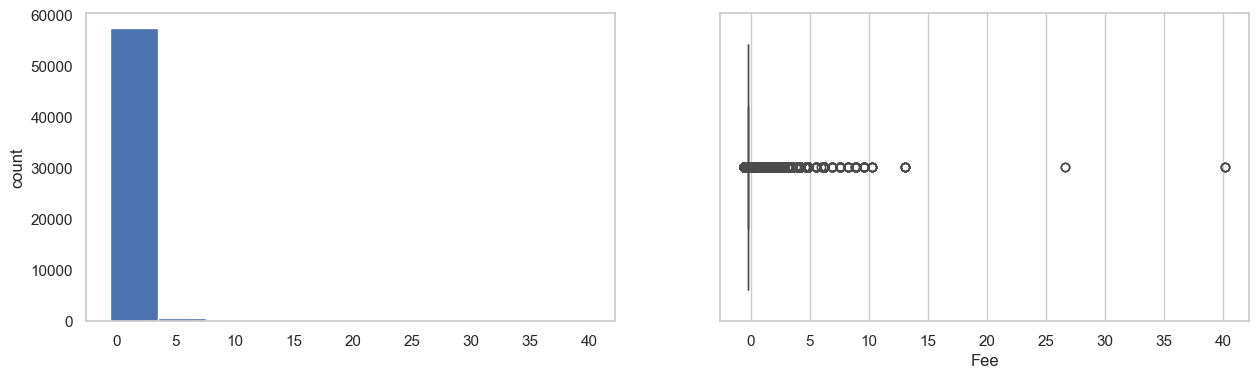

Quantity
Skew : 3.68


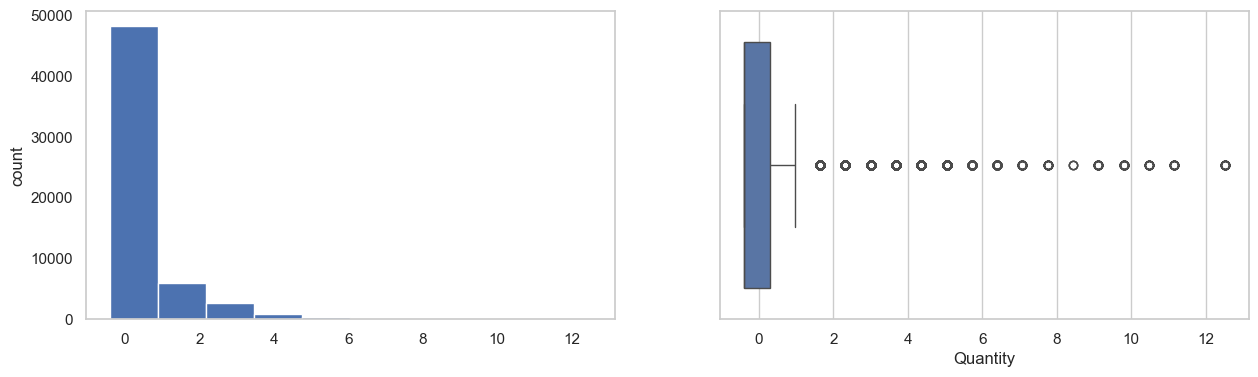

DescriptionLength
Skew : 3.51


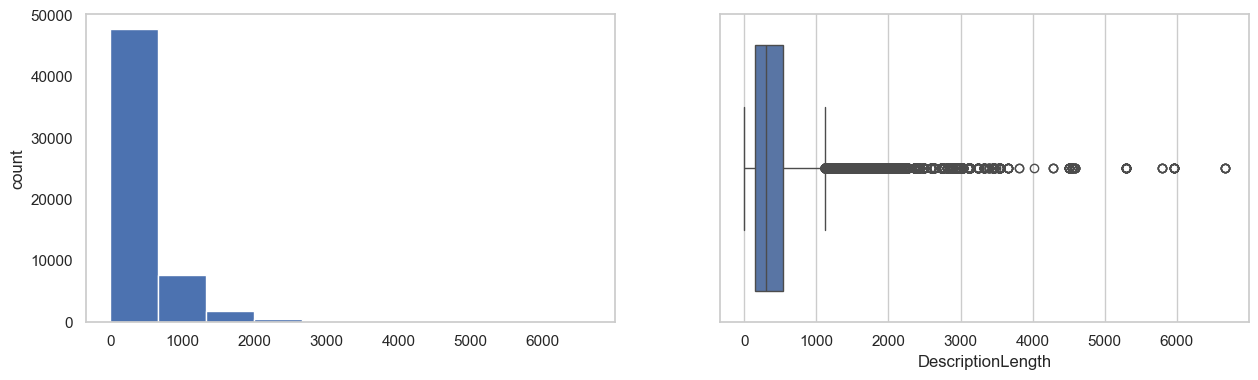

SentimentScore
Skew : 0.3


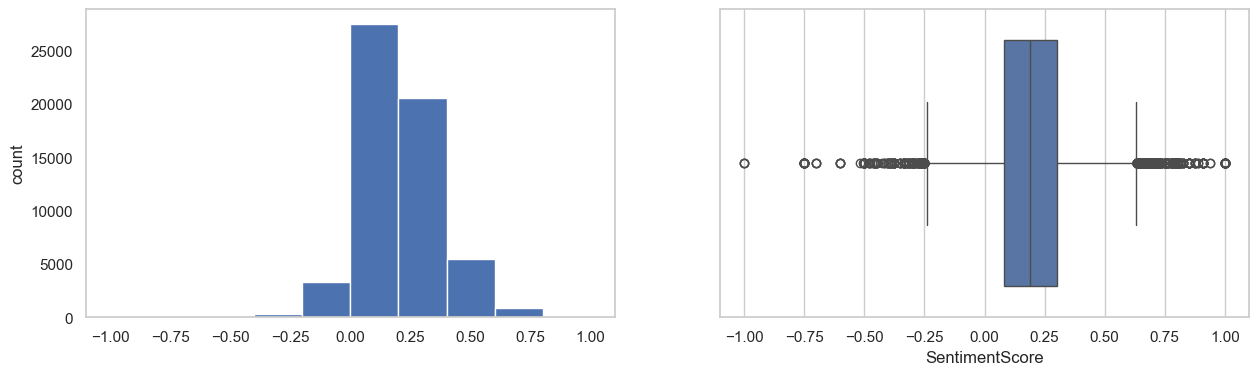

Energy
Skew : 7.18


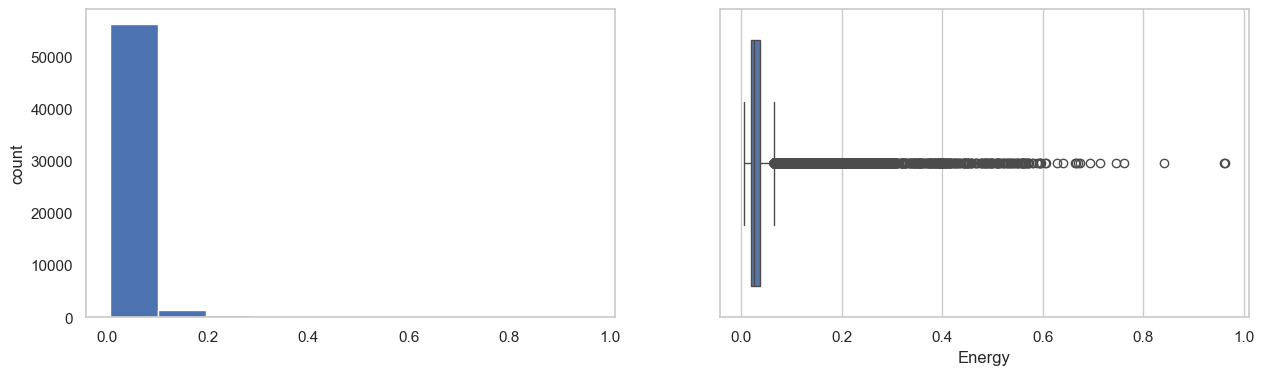

Contrast
Skew : 3.13


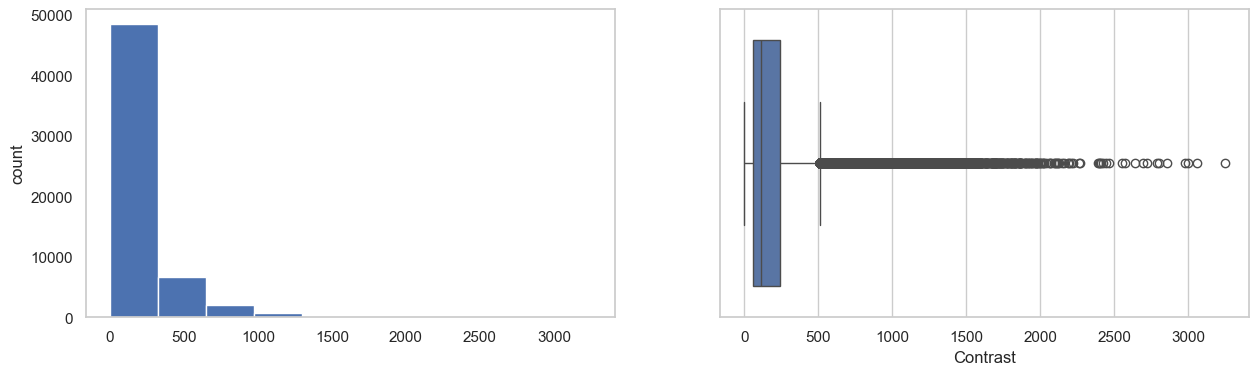

num_checkpoints
Skew : 2.76


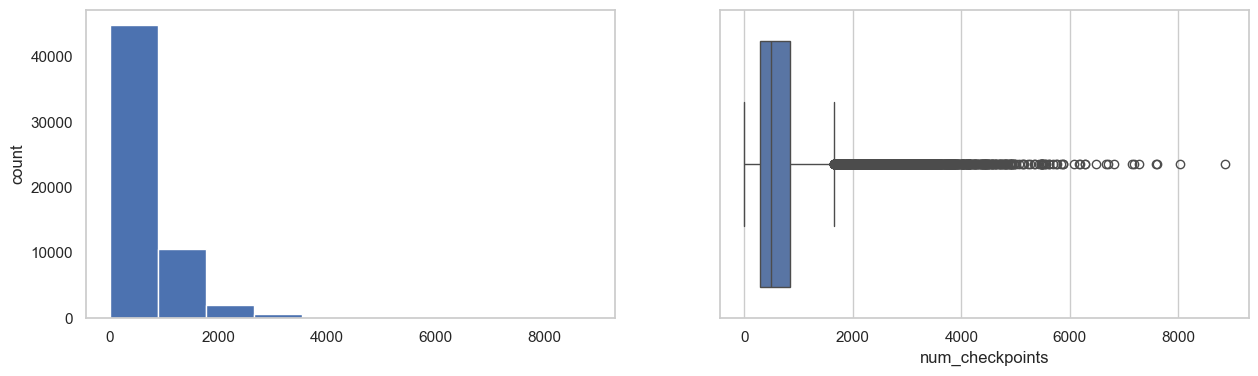

polarity
Skew : 0.3


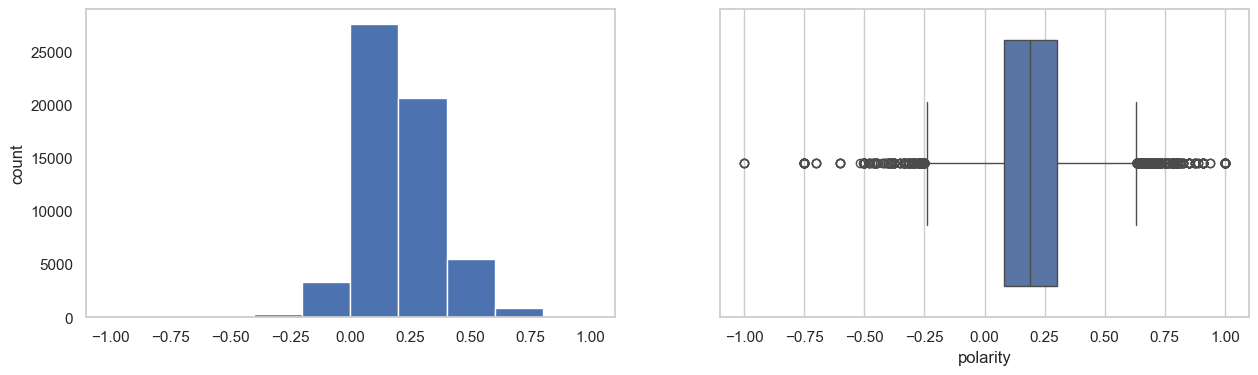

subjectivity
Skew : -0.7


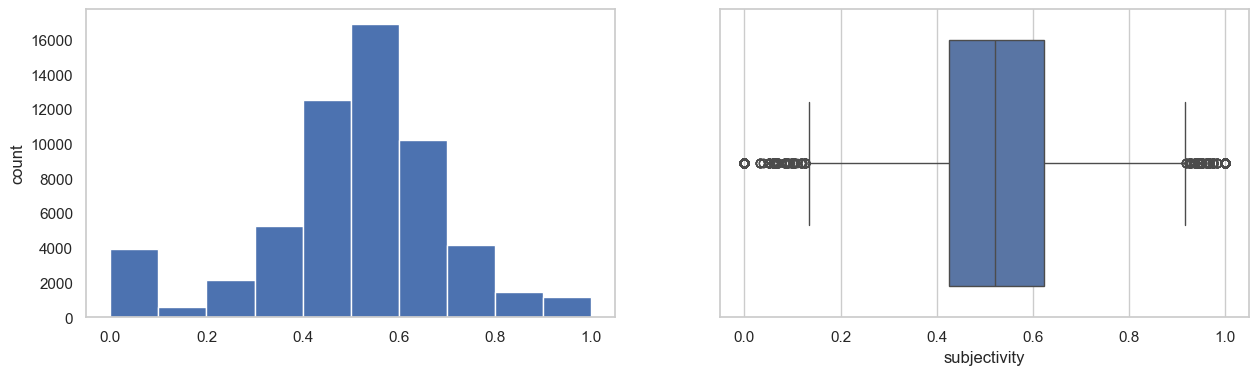

In [173]:
#Collecting numerical features for Univariate Analysis
numeric_cols = ['Age', 'Fee', 'Quantity', 'DescriptionLength',
            'SentimentScore', 'Energy', 'Contrast', 'num_checkpoints', 'polarity', 'subjectivity']

#Univariate Analysis
for column in numeric_cols:
    print(column)
    print('Skew :', round(df_petf[column].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_petf[column].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_petf[column])
    plt.show()

**Data Transformation**

In [174]:
#Loading libraries
from scipy.stats import boxcox

#Using Log transformation for numeric columns
df_petf['Age_log'] = np.log1p(df_petf['Age'])
df_petf['Fee_log'] = np.log1p(df_petf['Fee'])
df_petf['Quantity_log'] = np.log1p(df_petf['Quantity'])
df_petf['DescriptionLength_log'] = np.log1p(df_petf['DescriptionLength'])
df_petf['Energy_log'] = np.log1p(df_petf['Energy'])
df_petf['Contrast_log'] = np.log1p(df_petf['Contrast'])
df_petf['num_checkpoints_log'] = np.log1p(df_petf['num_checkpoints'])

#Using Box-Cox transformation for numeric columns
df_petf['Age_boxcox'], lambda_value = boxcox(df_petf['Age'] + 1)
df_petf['Quantity_boxcox'], lambda_value = boxcox(df_petf['Quantity'] + 1)
df_petf['Fee_boxcox'], lambda_value = boxcox(df_petf['Fee'] + 1)
df_petf['Energy_boxcox'], lambda_value = boxcox(df_petf['Energy'] + 1)

#Using Exponential transformation for emphasizing the differences in small values
df_petf['SentimentScore_exp'] = np.exp(df_petf['SentimentScore'])
df_petf['polarity_exp'] = np.exp(df_petf['polarity'])
df_petf['subjectivity_exp'] = np.exp(df_petf['subjectivity'])
df_petf['Energy_exp'], lambda_value = boxcox(df_petf['Energy'] + 1)

#Using Square root transformation to mitigate the impact of large values
df_petf['DescriptionLength_sqrt'] = np.sqrt(df_petf['DescriptionLength'])
df_petf['Contrast_sqrt'] = np.sqrt(df_petf['Contrast'])
df_petf['num_checkpoints_sqrt'] = np.sqrt(df_petf['num_checkpoints'])

**Text Data Processing (NLP)**

In [175]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leoko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leoko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Specify the target word for popularity (lowercased)
target_word = "language"

#Tokenization function
def tokenize(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

#Tokenize the text
df_petf['Tokenized_Text'] = df_petf['Description'].apply(tokenize)

# Calculate popularity for the target word
df_petf['Popularity'] = df_petf['Tokenized_Text'].apply(lambda tokens: tokens.count(target_word))

In [177]:
# Checking for new features created by data transformation
df_petf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58311 entries, 0 to 58310
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           58311 non-null  int64  
 1   Name                           58311 non-null  object 
 2   Age                            58311 non-null  float64
 3   Breed1                         58311 non-null  int64  
 4   Breed2                         58311 non-null  int64  
 5   Gender                         58311 non-null  int64  
 6   Color1                         58311 non-null  int64  
 7   Color2                         58311 non-null  int64  
 8   Color3                         58311 non-null  int64  
 9   MaturitySize                   58311 non-null  int64  
 10  FurLength                      58311 non-null  int64  
 11  Vaccinated                     58311 non-null  int64  
 12  Dewormed                       58311 non-null 

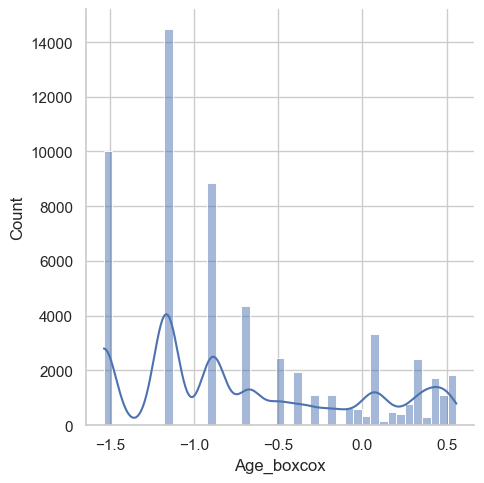

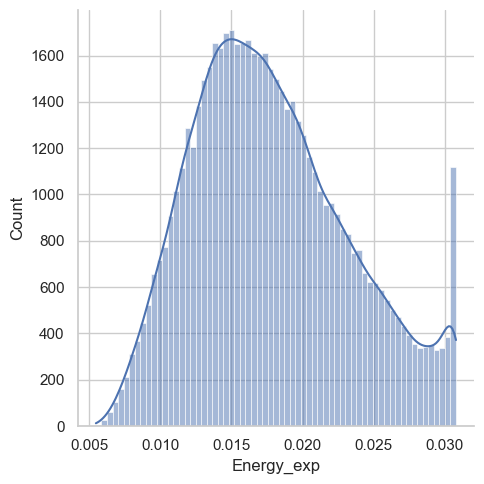

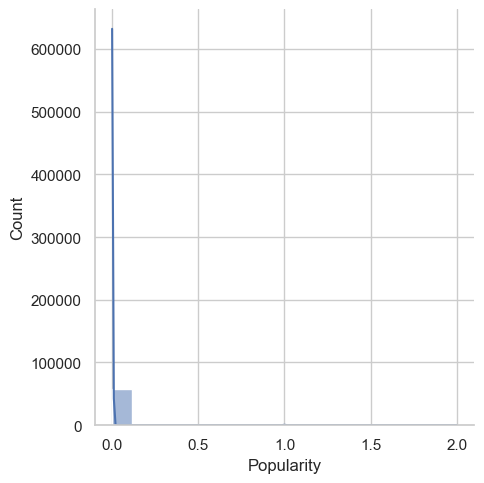

In [178]:
#Printing boxcox transformation for feature 'Age_log'
sns.displot(data = df_petf, x = "Age_boxcox", kde=True)

#Printing exponential transformation for feature 'Energy_log'
sns.displot(data = df_petf, x = "Energy_exp", kde=True)

#Printing popularity
sns.displot(data = df_petf, x = "Popularity", kde=True)

**Bivariate Analysis**

<Figure size 1300x1700 with 0 Axes>

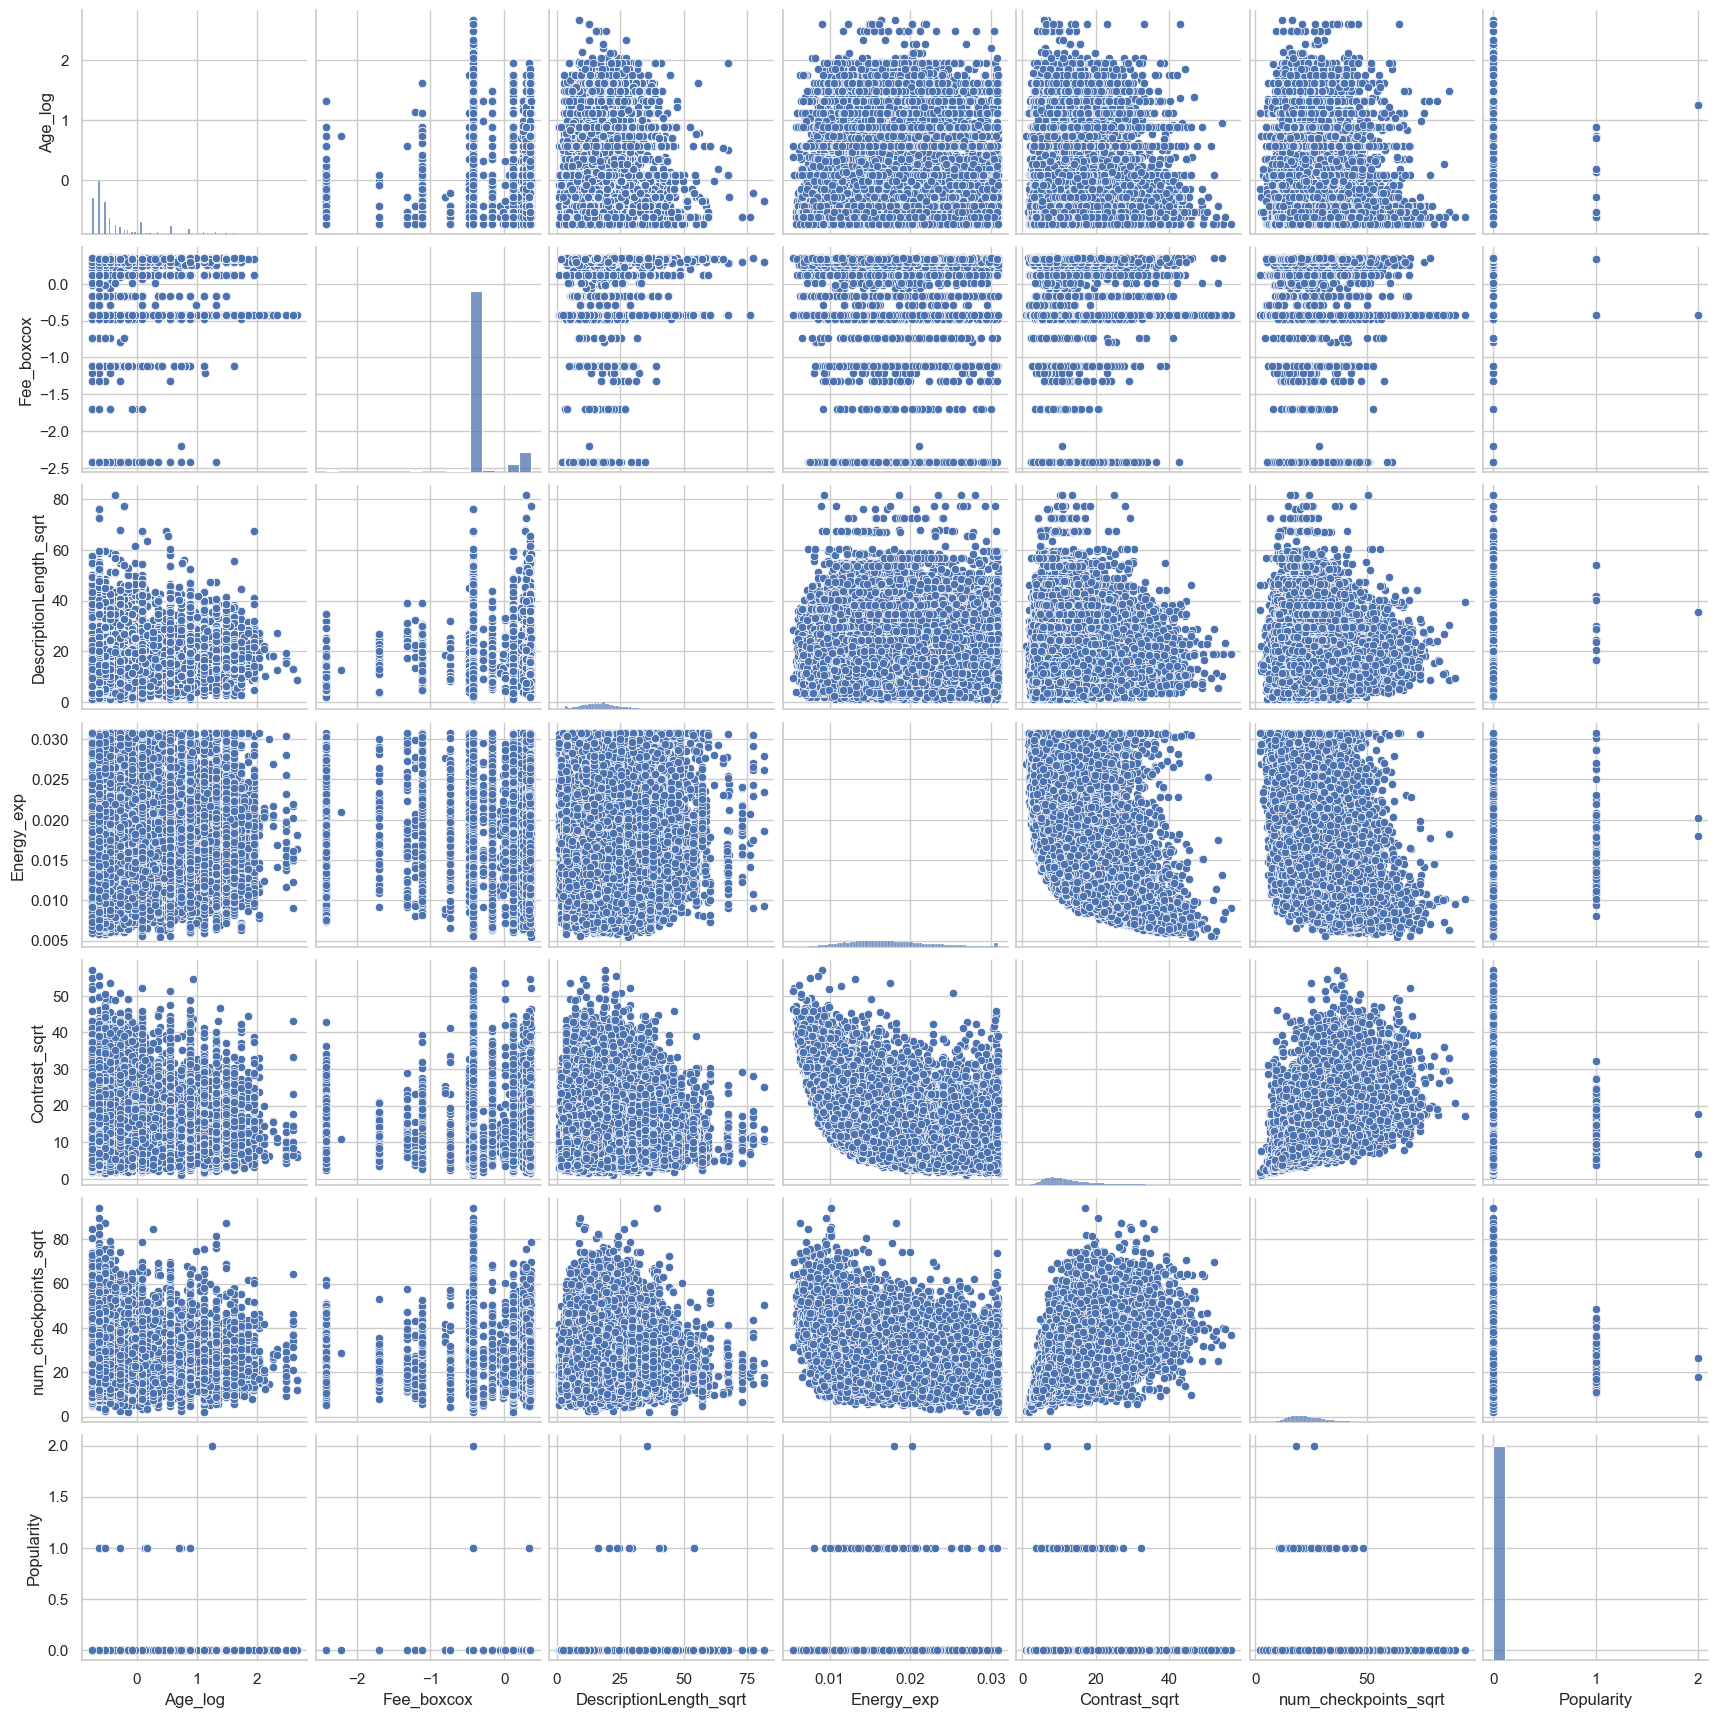

In [179]:
# Let's consider these features to identify correlations between each others in plots
features = ['Age_log', 'Fee_boxcox', 'DescriptionLength_sqrt',
            'Energy_exp', 'Contrast_sqrt', 'num_checkpoints_sqrt', 'Popularity']
plt.figure(figsize=(13,17))
sns.pairplot(data=df_petf[features])
plt.show()

**Multivariate Analysis**

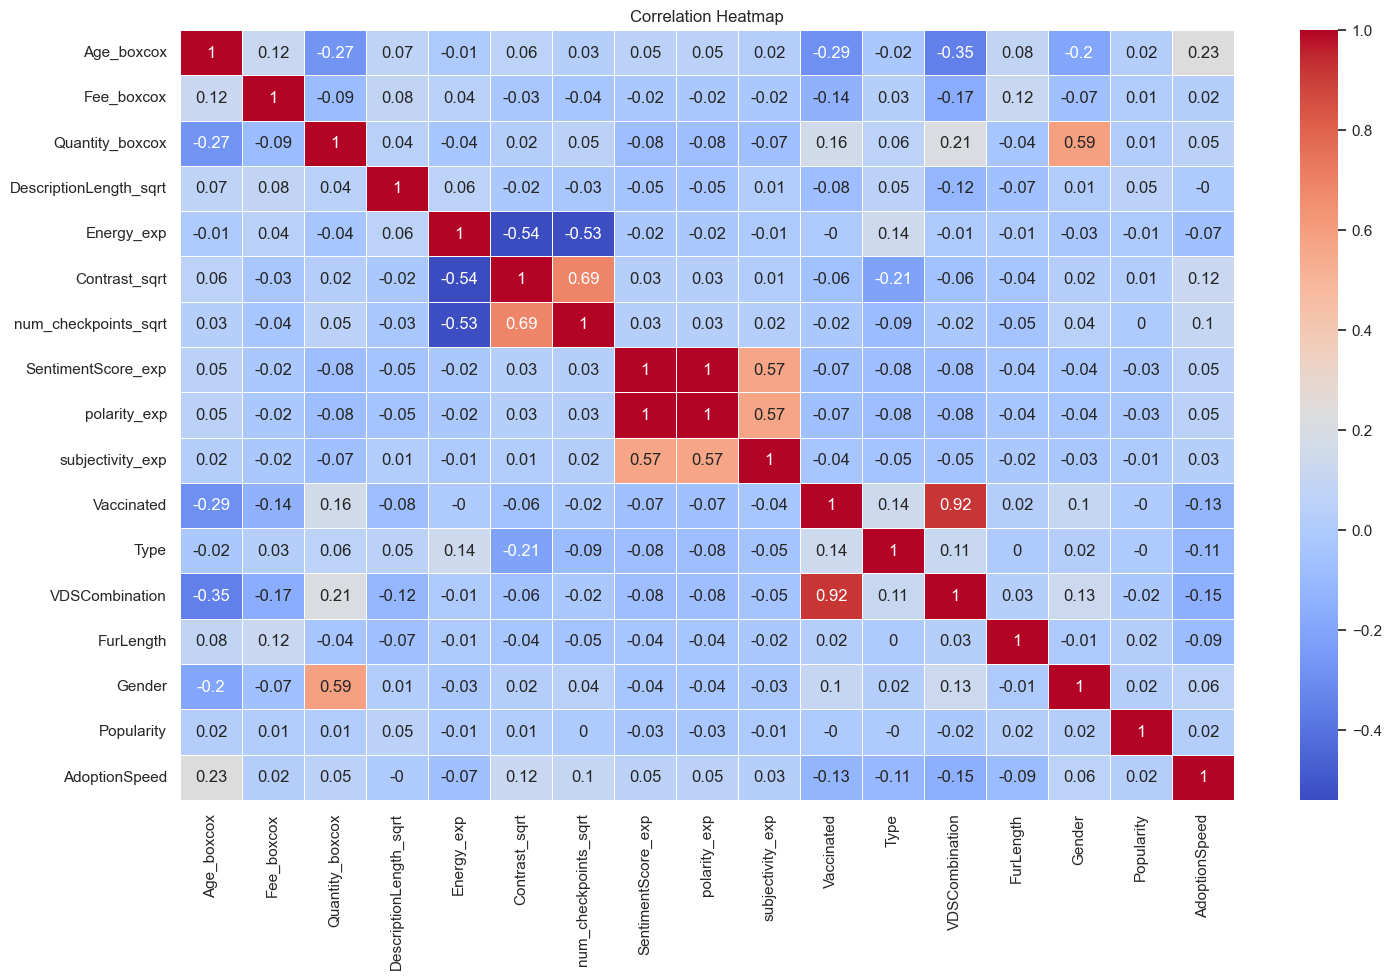

In [180]:
# detecting multi co linearity to stop data leakage

# Compute the correlation matrix between selected features
numeric_cols = ['Age_boxcox', 'Fee_boxcox', 'Quantity_boxcox', 'DescriptionLength_sqrt',
                'Energy_exp', 'Contrast_sqrt', 'num_checkpoints_sqrt',
                'SentimentScore_exp', 'polarity_exp', 'subjectivity_exp',
                'Vaccinated', 'Type', 'VDSCombination', 'FurLength', 'Gender',
                'Popularity',
                'AdoptionSpeed']

new_df_petf = pd.DataFrame(df_petf, columns=numeric_cols)
correlation_matrix = new_df_petf.corr(method='spearman').round(2)

plt.figure(figsize=(17,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidth = 0.5, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [181]:
#Checking for new numeric values
new_df_petf['Popularity'].isnull().sum()

0

In [182]:
# Import library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate the target variable 'AdoptionSpeed from the features
predictor_variables = ['Age_boxcox', 'Fee_boxcox', 'Quantity_boxcox', 'DescriptionLength_sqrt',
                'Energy_exp', 'Contrast_sqrt', 'num_checkpoints_sqrt',
                'SentimentScore_exp', 'polarity_exp', 'subjectivity_exp',
                'Vaccinated', 'Type', 'VDSCombination', 'FurLength', 'Gender']
target_variable = ['AdoptionSpeed']

x = new_df_petf[predictor_variables]
y = new_df_petf[target_variable]

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Scale the features using StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # Transforming "x_train"
# x_train = scaler.fit_transform(x_train)

# # Transforming "x_test"
# x_test = scaler.transform(x_test)

pd.DataFrame(x_train, columns = predictor_variables).head()

Age_boxcox  Fee_boxcox  Quantity_boxcox  DescriptionLength_sqrt  \
7654    -0.886592    -0.42356         0.192552               44.519659   
43634    0.353544    -0.42356        -0.917684               60.456596   
7361    -1.164078    -0.42356        -0.917684               22.271057   
13315   -1.164078    -0.42356        -0.917684                9.949874   
18551   -1.164078    -0.42356        -0.917684               12.845233   

       Energy_exp  Contrast_sqrt  num_checkpoints_sqrt  SentimentScore_exp  \
7654     0.008522      32.924460             41.315857            1.261573   
43634    0.017914      13.762494             22.956481            1.053163   
7361     0.019990       8.030423             33.166248            1.062279   
13315    0.018661      13.643717             17.944358            1.542390   
18551    0.023762       8.571816             14.317821            1.150993   

       polarity_exp  subjectivity_exp  Vaccinated  Type  VDSCombination  \
7654       1.261573          1.730944           2     1           212.0   
43634      1.053163          1.652848           2     1           211.0   
7361       1.062279          1.711722           2     1           222.0   
13315      1.542390          2.117000           1     1           112.0   
18551      1.150993          1.504309           1     1           122.0   

       FurLength  Gender  
7654           1       1  
43634          2       1  
7361           1       1  
13315          2       2  
18551          1       2

**Approach on Class Separability**


In [185]:
image_features=pd.read_csv("C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\image_features.csv")

In [186]:
#image_features=image_features.drop(image_features.columns[0], axis=1)
image_features.head()

PetID    Energy    Contrast  Correlation   Entropy        Mean  \
0  0008c5398-1  0.024081   78.820303     0.989859  7.601080  143.223922   
1  0008c5398-2  0.070913   41.355089     0.994805  7.284530   91.658592   
2  0008c5398-3  0.040957   66.469614     0.989986  7.594550  111.068160   
3  0008c5398-4  0.050778  150.613044     0.984973  7.517500  108.980235   
4  0008c5398-5  0.025575   79.317245     0.992683  7.719211  141.169160   

     Std_Dev  num_checkpoints  
0  70.638848              319  
1  64.059420              233  
2  73.856578              410  
3  71.533391              469  
4  76.906123              395

In [187]:
#clean petID column
image_features["PetID"]=image_features["PetID"].str.split("-", expand=True)[0]

image_features.head(3)

PetID    Energy   Contrast  Correlation  Entropy        Mean  \
0  0008c5398  0.024081  78.820303     0.989859  7.60108  143.223922   
1  0008c5398  0.070913  41.355089     0.994805  7.28453   91.658592   
2  0008c5398  0.040957  66.469614     0.989986  7.59455  111.068160   

     Std_Dev  num_checkpoints  
0  70.638848              319  
1  64.059420              233  
2  73.856578              410

In [188]:
#Group by ID
image_features_transformed=image_features.groupby("PetID", as_index=False).mean()

In [189]:
sentiment_features=pd.read_csv("C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\processed_train.csv")
sentiment_features.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90       3.0   

   AdoptionSpeed  polarity  subjectivity  
0              2  0.130357      0.407143  
1              0  0.100000      0.400000  
2              3  0.261905      0.542857  
3              2  0.341146      0.437500  
4              2  0.400000      0.743750

In [190]:
sentiment_features.shape

(14993, 26)

In [191]:
image_features.shape, image_features_transformed.shape

((72776, 8), (18510, 8))

In [192]:
all_data=sentiment_features.merge(image_features_transformed, how="left", on="PetID")
all_data.head(3)

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   

   AdoptionSpeed  polarity  subjectivity    Energy    Contrast  Correlation  \
0              2  0.130357      0.407143  0.035852  157.460689     0.986806   
1              0  0.100000      0.400000  0.022545   63.340863     0.993091   
2              3  0.261905      0.542857  0.030182   78.109415     0.982029   

    Entropy        Mean    Std_Dev  num_checkpoints  
0  7.433718   95.712315  77.438182       482.000000  
1  7.714046  102.676512  68.204360       187.500000  
2  7.185988  142.957730  48.593305       296.857143

In [193]:
all_data.columns , len(all_data.columns)

(Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
        'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
        'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
        'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
        'polarity', 'subjectivity', 'Energy', 'Contrast', 'Correlation',
        'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints'],
       dtype='object'),
 33)

In [194]:
all_data[["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State","PetID"]].head()

Type  Breed1  Breed2  Gender  Color1  Color2  Color3  MaturitySize  \
0     2     299       0       1       1       7       0             1   
1     2     265       0       1       1       2       0             2   
2     1     307       0       1       2       7       0             2   
3     1     307       0       2       1       2       0             2   
4     1     307       0       1       1       0       0             2   

   FurLength  Vaccinated  Dewormed  Sterilized  Health  State      PetID  
0          1           2         2           2       1  41326  86e1089a3  
1          2           3         3           3       1  41401  6296e909a  
2          2           1         1           2       1  41326  3422e4906  
3          1           1         1           2       1  41401  5842f1ff5  
4          1           2         2           2       1  41326  850a43f90

In [195]:
all_data["FurLength"].unique()

array([1, 2, 3], dtype=int64)

In [196]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

**PCA**

In [197]:
# Create a dummy dataframe with both categorical and numerical columns

columns_to_drop=["Name","Description","RescuerID"]
categorical_columns=["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State","PetID"]
numerical_columns=['polarity', 'subjectivity', 'Energy', 'Contrast', 'Correlation',
       'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints','PhotoAmt','VideoAmt',"Age","Quantity","Fee"]

target=all_data["AdoptionSpeed"]
all_data=all_data.drop("AdoptionSpeed", axis=1)



#simple filling
all_data[categorical_columns] = all_data[categorical_columns].fillna("unknown")
all_data.fillna(all_data[numerical_columns].median(), inplace=True)
#all_data=all_data.fillna(0)

#transformation
all_data[categorical_columns]=all_data[categorical_columns].astype(str)
all_data[numerical_columns]=all_data[numerical_columns].astype(float)

all_data=all_data.drop(columns_to_drop, axis=1)

#normalize numerical columns:

for column in numerical_columns:
  all_data[numerical_columns] = (all_data[numerical_columns] - all_data[numerical_columns].mean()) / all_data[numerical_columns].std()


# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cat = encoder.fit_transform(all_data[categorical_columns])
encoded_cat = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical columns and the numerical columns
X = pd.concat([encoded_cat, all_data[numerical_columns]], axis=1)

# Perform PCA on the combined data
pca = PCA(n_components=14, )
pca_data = pca.fit_transform(X)

C:\Users\leoko\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [198]:
pca_data = pd.DataFrame(pca_data)

In [199]:
print(pca.explained_variance_ratio_)

print(pca.components_)

[0.11663179 0.07489694 0.06708838 0.06452002 0.0578784  0.05402035
 0.04491721 0.04183083 0.04082405 0.03427079 0.03340837 0.02477002
 0.02339944 0.02220482]
[[ 8.17089287e-02 -8.17089287e-02  7.04708644e-05 ...  2.05823728e-02
   3.70447588e-02 -9.81414965e-03]
 [ 1.13474081e-01 -1.13474081e-01 -3.74956977e-06 ...  3.73812920e-01
  -3.83703729e-01  1.78497326e-01]
 [ 3.06233806e-02 -3.06233806e-02  3.41109048e-05 ...  2.93767985e-01
  -2.44279370e-01  1.66007903e-01]
 ...
 [ 4.43938561e-02 -4.43938561e-02 -1.95558152e-05 ... -1.53030875e-01
   2.79198930e-02 -1.59547607e-03]
 [ 1.22528823e-01 -1.22528823e-01  1.86053526e-04 ...  2.66243782e-01
  -1.61964972e-01  7.03764545e-02]
 [ 1.27293706e-02 -1.27293706e-02 -5.83100634e-05 ... -9.55114901e-03
   2.41578200e-01  3.25889193e-02]]


In [200]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.12 0.07 0.07 0.06 0.06 0.05 0.04 0.04 0.04 0.03]


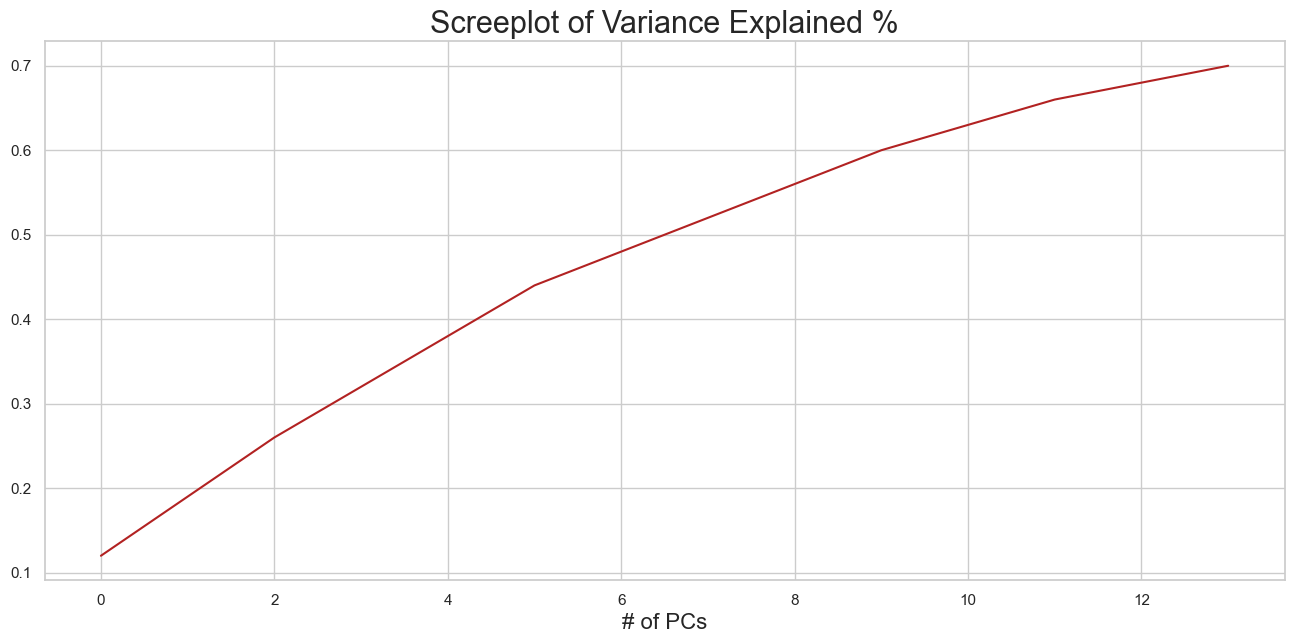

In [201]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [202]:
pca_data.head()

0         1         2         3         4         5         6   \
0 -0.604106 -0.819422  0.238892 -0.270389 -1.306638 -0.652097  0.269963   
1 -0.714525 -0.902383  0.250052 -1.253288 -1.219482 -0.490955 -0.102255   
2 -1.092104  0.733364 -0.176084 -0.145397  0.439406  0.531051 -0.949138   
3 -0.241502  0.377959 -0.447610 -0.798102 -0.194653  1.157786  0.500191   
4 -1.465296  1.043056 -1.362919  1.233223 -0.867129 -0.892260 -0.848456   

         7         8         9         10        11        12        13  
0  1.937159 -0.959592  0.485091  0.412230 -0.798072  0.259926  0.609048  
1  0.202045 -0.795531  0.009971  0.168518 -0.713605 -0.124492 -0.655824  
2 -0.673335  1.607342 -0.937639 -0.503719  0.093268  0.176357  0.145848  
3  1.339629  0.282886 -1.667357 -0.187460  0.670160 -0.314100 -0.248092  
4 -0.162946  0.943938 -0.136355  0.403343 -0.242270  0.779366  0.409931

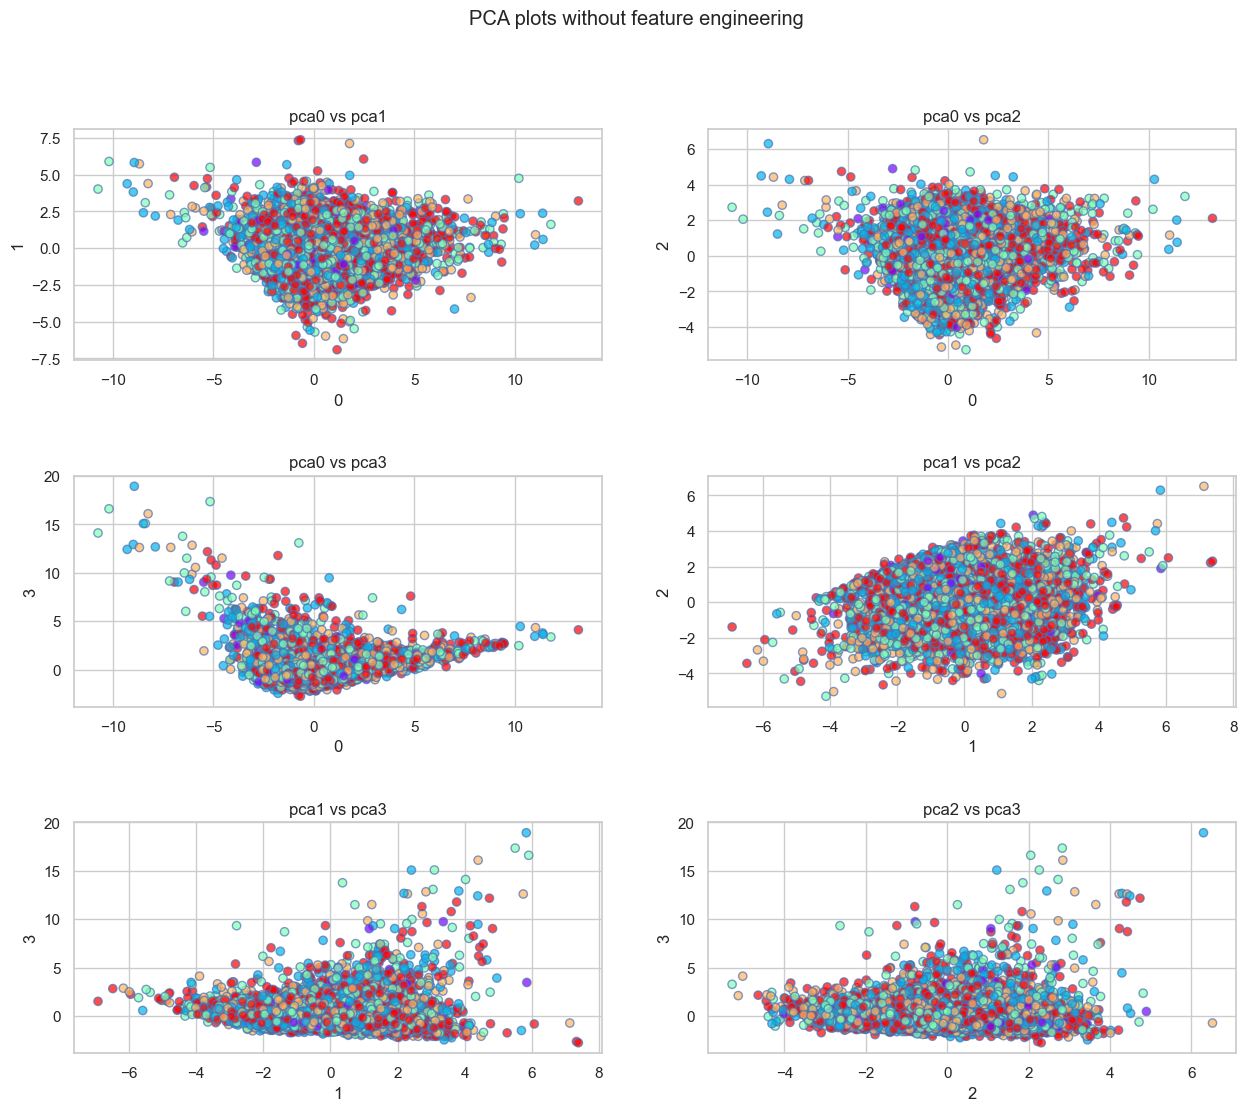

In [203]:
from itertools import combinations
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("PCA plots without feature engineering")
n=1
for col1, col2 in combinations(pca_data.columns[:4], 2):
    ax = plt.subplot(3, 2, n)

    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title("pca{} vs pca{}".format(col1, col2))
    plt.scatter(pca_data[col1], pca_data[col2],c=target, label=target.unique(),cmap='rainbow',
  alpha=0.7,edgecolors='b')
    #plt.show()
    n=n+1

**LDA**

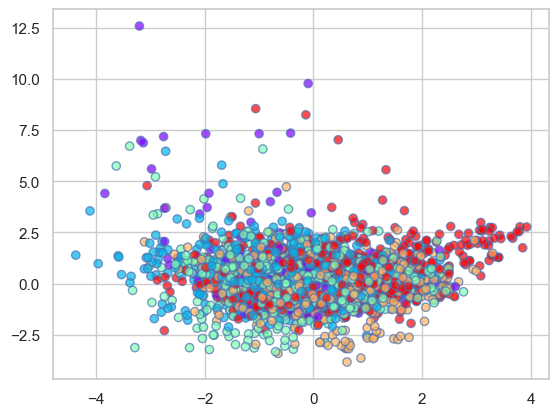

In [204]:
#LDA
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 

# divide the dataset into class and target variable
X = encoded_cat[:7000]
y = target[:7000]
 
# Preprocess the dataset and divide into train and test
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
 
# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
  alpha=0.7,edgecolors='b'
)

In [205]:
import pandas as pd
all_data=pd.read_csv("C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\preliminary_features.csv")
#all_data.drop('Unnamed: 0', inplace=True, axis=1)

In [206]:
columns_to_drop=["Name","Description","RescuerID","PetID"]

In [207]:
import prince

all_data.set_index("AdoptionSpeed", inplace=True)
all_data.drop(columns_to_drop, axis=1, inplace=True)
famd = prince.FAMD(
    n_components=2,
    n_iter=30,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
)
famd = famd.fit(all_data)

C:\Users\leoko\AppData\Roaming\Python\Python312\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.06086275832670119, -0.03286964624210119, -0.021518234567264212, -0.024847117039791002, -0.017569564951772036, -0.027779921372933013, -0.03513912990354407, -0.05958129358143515, -0.012423558519895501, -0.043036469134528424, -0.0869649096392685, -0.1964337078363004, -0.12790836355575197, -0.052708694855316096, -0.04479377726721073, -0.13834289277321493, -0.0669029101207173, -0.07027825980708814, -0.08784782475886017, -0.07857348313452016, -0.03928674156726008, -0.049694234079582005, -0.1454140242986409, -0.030431379163350595, -0.14327546627925056, -0.09296939901197068, -0.10901628357676502, -0.11386379463626935, -0.1652846959479808, -0.1842711517991869, -0.06573929248420238, -0.0372706755596865, -0.05122364402357136, -0.05555984274586603, -0.20639565532744622, -0.048116235248188546, -0.041204282171516456, -0.2747264280686591, -0.

In [208]:
famd.row_coordinates(all_data).head()

C:\Users\leoko\AppData\Roaming\Python\Python312\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.06086275832670119, -0.03286964624210119, -0.021518234567264212, -0.024847117039791002, -0.017569564951772036, -0.027779921372933013, -0.03513912990354407, -0.05958129358143515, -0.012423558519895501, -0.043036469134528424, -0.0869649096392685, -0.1964337078363004, -0.12790836355575197, -0.052708694855316096, -0.04479377726721073, -0.13834289277321493, -0.0669029101207173, -0.07027825980708814, -0.08784782475886017, -0.07857348313452016, -0.03928674156726008, -0.049694234079582005, -0.1454140242986409, -0.030431379163350595, -0.14327546627925056, -0.09296939901197068, -0.10901628357676502, -0.11386379463626935, -0.1652846959479808, -0.1842711517991869, -0.06573929248420238, -0.0372706755596865, -0.05122364402357136, -0.05555984274586603, -0.20639565532744622, -0.048116235248188546, -0.041204282171516456, -0.2747264280686591, -0.

component             0         1
AdoptionSpeed                    
2              4.214693 -5.816055
0              0.228647 -0.485286
0              0.459619 -1.291746
3             -4.942247  0.473450
3             -4.827923  0.736891

In [209]:
famd.plot(
    all_data[:1000],
    x_component=0,
    y_component=1
)

C:\Users\leoko\AppData\Roaming\Python\Python312\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[nan, nan, nan, nan, nan, -0.1341640786499874, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.16431676725154984, -0.23237900077244503, nan, nan, nan, nan, -0.28460498941515416, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.36742346141747667, nan, nan, nan, nan, -0.34205262752974136, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.21213203435596426, nan, nan, nan, nan, nan, nan, -0.2683281572999748, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.46475800154489005, -0.09486832980505137, nan, -0.4347413023856832, nan, nan, nan, -0.18973665961010275, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.25099800796022265, nan, nan, nan, nan, nan, -0.4

alt.LayerChart(...)

In [210]:
famd.column_contributions_.style.format('{:.2%}')

**Class Separability with feature engineering**

In [211]:
import pandas as pd
all_data=pd.read_csv("C:\\Users\\leoko\\Downloads\\petfinder-adoption-prediction\\output\\preliminary_features.csv")
#all_data.drop('Unnamed: 0', inplace=True, axis=1)

In [212]:
all_data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'Breed1AgeFurLength', 'VDSCombination', 'ColorCount',
       'TotalVisualMedia', 'DescriptionLength', 'SentimentScore', 'Energy',
       'Contrast', 'Correlation', 'Entropy', 'Mean', 'Std_Dev',
       'num_checkpoints'],
      dtype='object')

In [213]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [214]:
# Create a dummy dataframe with both categorical and numerical columns

columns_to_drop=["Name","Description","RescuerID","PetID"]
categorical_columns=["Type",'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health',"State"]
numerical_columns=['SentimentScore', 'Energy', 'Contrast', 'Correlation',
       'Entropy', 'Mean', 'Std_Dev', 'num_checkpoints','PhotoAmt','VideoAmt',"Age","Quantity","Fee"]

target=all_data["AdoptionSpeed"]
all_data=all_data.drop("AdoptionSpeed", axis=1)



#simple filling
all_data[categorical_columns] = all_data[categorical_columns].fillna("unknown")
all_data.fillna(all_data[numerical_columns].median(), inplace=True)
#all_data=all_data.fillna(0)

#transformation
all_data[categorical_columns]=all_data[categorical_columns].astype(str)
all_data[numerical_columns]=all_data[numerical_columns].astype(float)

all_data=all_data.drop(columns_to_drop, axis=1)

#normalize numerical columns:

for column in numerical_columns:
  all_data[numerical_columns] = (all_data[numerical_columns] - all_data[numerical_columns].mean()) / all_data[numerical_columns].std()


# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_cat = encoder.fit_transform(all_data[categorical_columns])
encoded_cat = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical columns and the numerical columns
X = pd.concat([encoded_cat, all_data[numerical_columns]], axis=1)

# Perform PCA on the combined data
pca = PCA(n_components=14, )
pca_data = pca.fit_transform(X)

C:\Users\leoko\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [215]:
pca_data = pd.DataFrame(pca_data)
print(pca.explained_variance_ratio_)

print(pca.components_)

[0.12700286 0.08180321 0.07040397 0.06507758 0.06149999 0.0502052
 0.04831881 0.04573533 0.04447697 0.03910402 0.03444903 0.02781854
 0.02519955 0.02393505]
[[-7.37783476e-02  7.37783476e-02 -4.39378707e-05 ... -3.15649782e-02
  -2.04128042e-02  6.60300265e-03]
 [ 6.94767437e-02 -6.94767437e-02  3.18644895e-05 ...  4.42598464e-01
  -5.28241794e-01  2.19804902e-01]
 [ 3.59065662e-02 -3.59065662e-02  9.08049614e-05 ... -4.37600209e-02
   1.63769363e-01  2.53406593e-04]
 ...
 [ 6.38520140e-02 -6.38520140e-02 -3.61414298e-05 ... -9.54149821e-02
   3.62494922e-02  3.09462182e-02]
 [ 7.90404995e-02 -7.90404995e-02  1.78586665e-05 ...  2.70340434e-01
  -9.83529011e-02  3.17846262e-02]
 [ 2.11774615e-02 -2.11774615e-02 -1.55401645e-04 ... -1.38743747e-02
   2.85332714e-01  5.94230316e-02]]


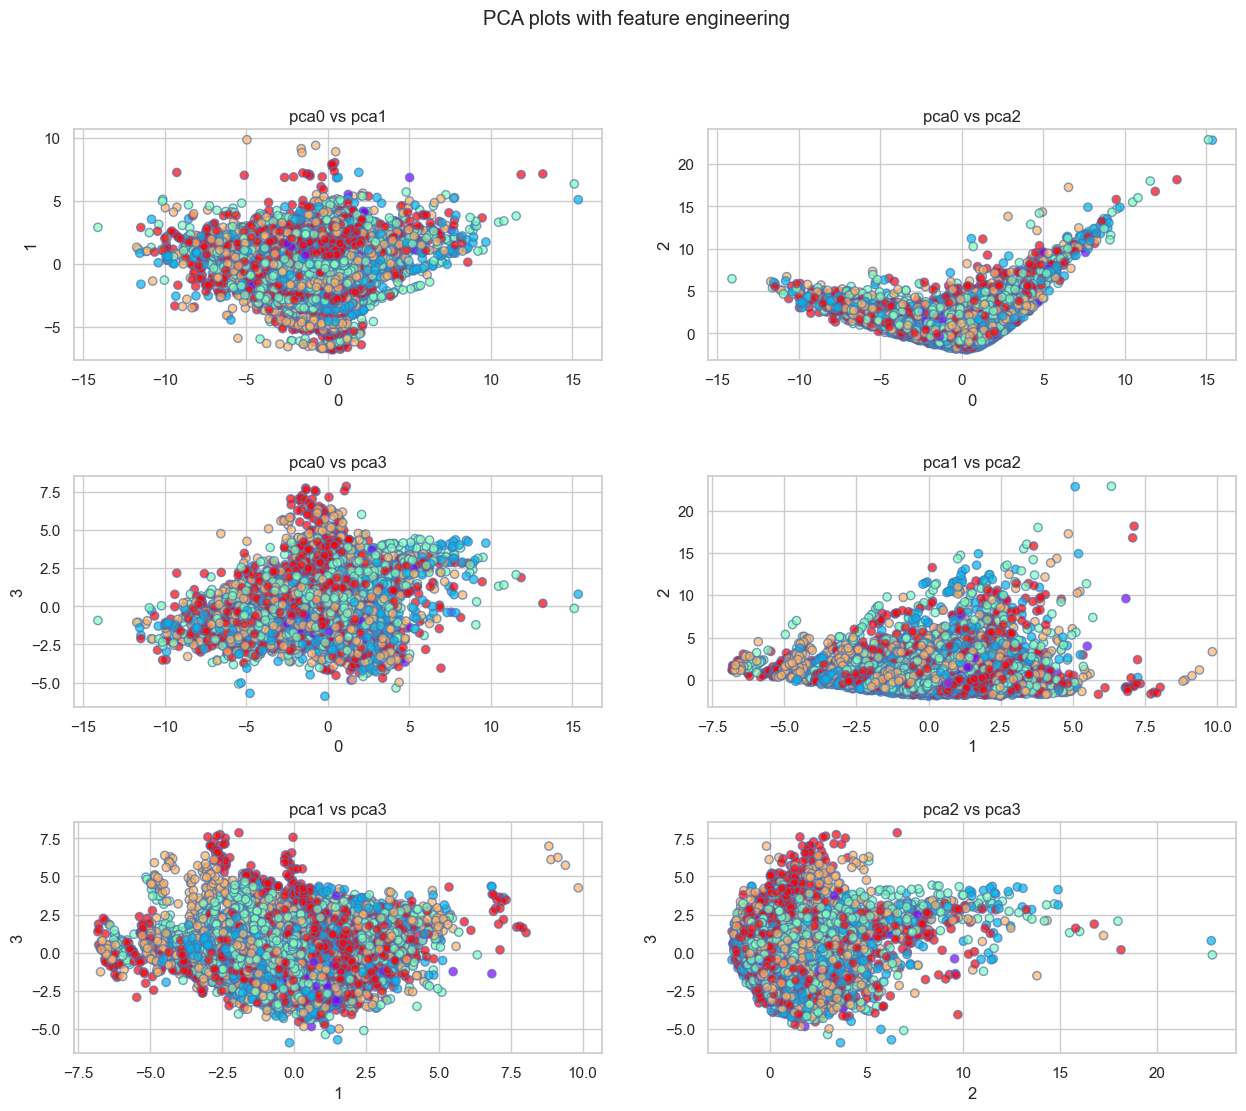

In [216]:
from itertools import combinations
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("PCA plots with feature engineering")
n=1
for col1, col2 in combinations(pca_data.columns[:4], 2):
    ax = plt.subplot(3, 2, n)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title("pca{} vs pca{}".format(col1, col2)) 
    plt.scatter(pca_data[col1], pca_data[col2],c=target, label=target.unique(),cmap='rainbow',
  alpha=0.7,edgecolors='b')
    #plt.show()
    n=n+1

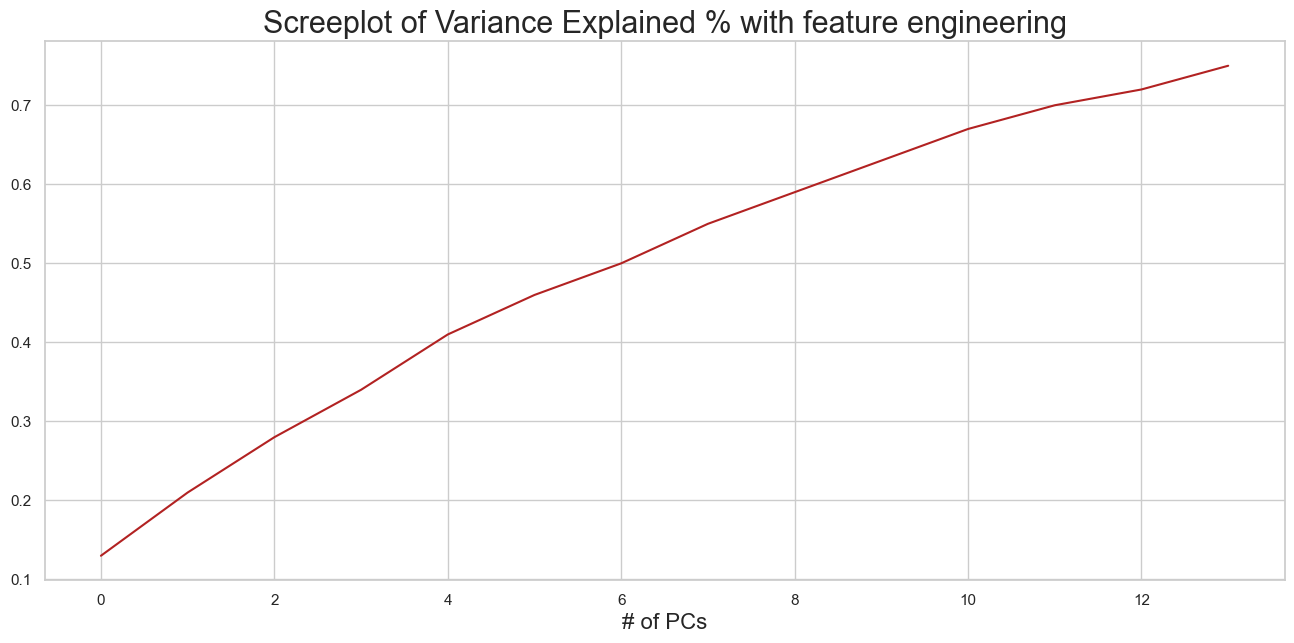

In [217]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained % with feature engineering', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

## **Modelling**

In [6]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import warnings
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from joblib import Parallel, delayed
from tqdm import tqdm, tqdm_notebook
from sklearn.model_selection import GridSearchCV
import os
from sklearn.model_selection import StratifiedKFold


# part 2
# required packages
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

from textblob import TextBlob
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
import json
import cv2
import skimage.feature as skf
import skimage.filters as skg
from skimage.measure import shannon_entropy
from scipy.stats import entropy
from sklearn.cluster import KMeans

from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import pandas as pd

from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer


%matplotlib inline

np.random.seed(seed=555)
warnings.filterwarnings('ignore')



In [7]:

# Load data
train = pd.read_csv('input/train/train.csv')
test = pd.read_csv('input/test/test.csv')
breed_labels = pd.read_csv('input/breed_labels.csv')
color_labels = pd.read_csv('input/color_labels.csv')
state_labels = pd.read_csv('input/state_labels.csv')


In [8]:
train.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90       3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2

In [5]:
# Display basic information about the data
train.info()

# Check for missing values
train.isnull().sum()

# Descriptive statistics
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086      0.547959      0.599070   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      2.000000      1.000000   
50%        2.000000      2.000000      0.000000      2.000000      1.000000   
75%        3.000000      6.000000      5.000000      2.000000      2.000000   
max        7.000000      7.000000      7.000000      4.000000      3.000000   

         Vaccinated      Dewormed    Sterilized        Health      Quantity  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.731208      1.558727      1.914227      1.036617      1.576069   
std        0.667649      0.695817      0.566172      0.199535      1.472477   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        1.000000      1.000000      2.000000      1.000000      1.000000   
50%        2.000000      1.000000      2.000000      1.000000      1.000000   
75%        2.000000      2.000000      2.000000      1.000000      1.000000   
max        3.000000      3.000000      3.000000      3.000000     20.000000   

                Fee         State      VideoAmt      PhotoAmt  AdoptionSpeed  
count  14993.000000  14993.000000  14993.000000  14993.000000   14993.000000  
mean      21.259988  41346.028347      0.056760      3.889215       2.516441  
std       78.414548     32.444153      0.346185      3.487810       1.177265  
min        0.000000  41324.000000      0.000000      0.000000       0.000000  
25%        0.000000  41326.000000      0.000000      2.000000       2.000000  
50%        0.000000  41326.000000      0.000000      3.000000       2.000000  
75%        0.000000  41401.000000      0.000000      5.000000       4.000000  
max     3000.000000  41415.000000      8.000000     30.000000       4.000000

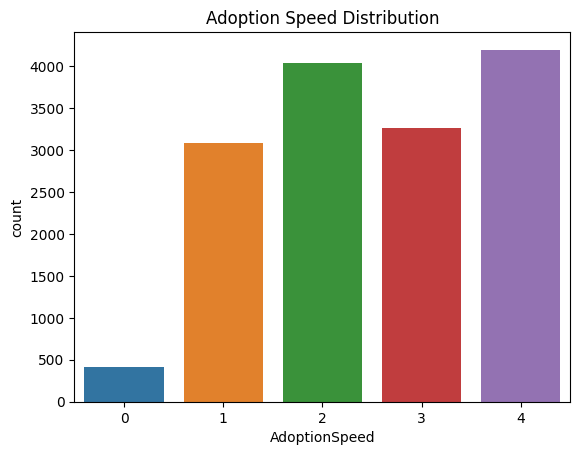

In [6]:
# Visualize AdoptionSpeed distribution
sns.countplot(x='AdoptionSpeed', data=train)
plt.title('Adoption Speed Distribution')
plt.show()

## Age

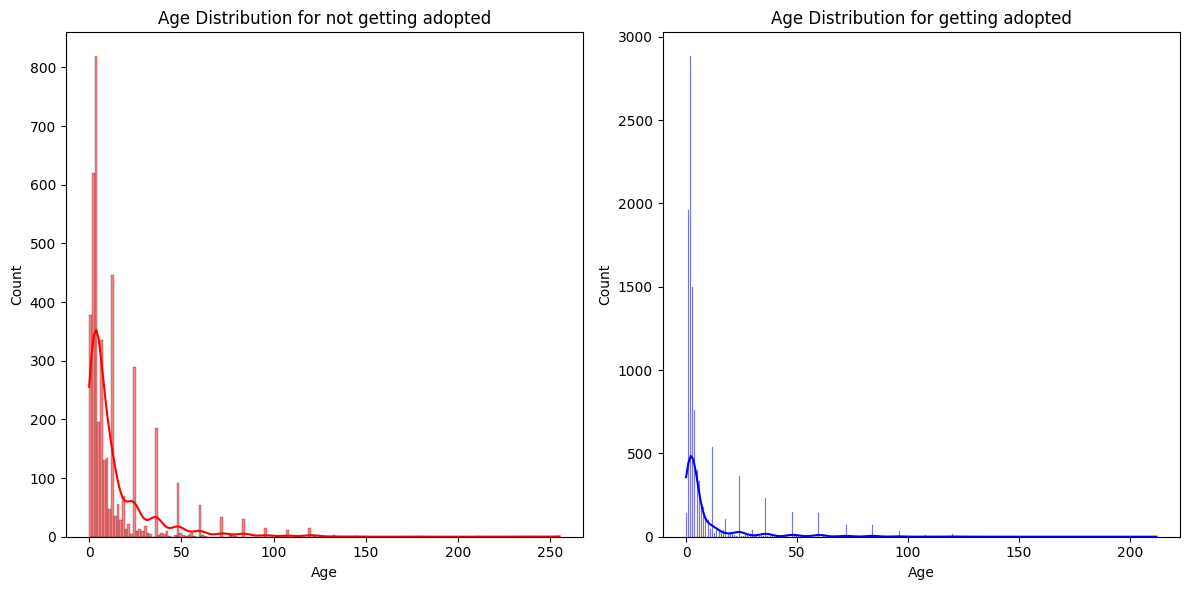

In [7]:
data = train.copy()

data_4 = data[data['AdoptionSpeed']==4]
data_rest = data[data['AdoptionSpeed']<4]
# Create subplots
plt.figure(figsize=(12, 6))
# Plot age distribution for fraud cases
plt.subplot(1, 2, 1)
sns.histplot(data=data_4, x='Age', kde=True, color='red')
plt.title("Age Distribution for not getting adopted")

# Plot age distribution for non-fraud cases
plt.subplot(1, 2, 2)
sns.histplot(data=data_rest, x='Age', kde=True, color='blue')
plt.title("Age Distribution for getting adopted")

# Show the plots
plt.tight_layout()
plt.show()

In [22]:
# checking age where month is greater than 100. 
np.where(train['Age']>100)

(array([  113,   145,   513,  1057,  1141,  1363,  1703,  1858,  1867,
         2263,  2497,  2767,  2830,  3195,  3684,  3931,  3998,  4071,
         4344,  4456,  4522,  4617,  4796,  5007,  5067,  5160,  5485,
         5535,  5569,  5593,  6264,  6569,  6618,  6666,  6722,  6894,
         6992,  7166,  7250,  7289,  7482,  7512,  7614,  7823,  8058,
         8065,  8304,  8492,  8944,  9267,  9378,  9563,  9970, 10089,
        10128, 10337, 10426, 10501, 10658, 10737, 10917, 11087, 11172,
        11216, 11314, 11523, 11605, 11640, 11968, 12526, 12575, 12621,
        12737, 12855, 12947, 13079, 13398, 13493, 13665, 13744, 14189,
        14303, 14637, 14732], dtype=int64),)

In [36]:
def age_segment(df):

    # Creating the "age_group" column by binning them into 4 groups
    conditions = [
        df['Age'] < 20,
        (df['Age'] >= 20) & (df['Age'] <= 40),
        (df['Age'] >= 40) & (df['Age'] <= 60),
        (df['Age'] >= 60) & (df['Age'] <= 80),
        (df['Age'] >= 80) & (df['Age'] <= 100)
    ]
    choices = ['1-20', '20-40', '40-60', '60-80','80-100']
    df['AgeGroup'] = np.select(conditions, choices, default='Unknown')
    
    return df


In [5]:
def extract_texture_features(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    haralick = skf.graycomatrix(img_gray, [1], [0], 256, symmetric=True, normed=True) 
    energy = skf.graycoprops(haralick, 'energy')[0, 0] 
    contrast = skf.graycoprops(haralick, 'contrast')[0, 0] 
    correlation = skf.graycoprops(haralick, 'correlation')[0, 0] 
    entropy = shannon_entropy(img_gray)

    mean = np.mean(img)
    std_dev = np.std(img)

    return energy, contrast, correlation, entropy, mean, std_dev


In [97]:
def extract_keypoints(file_path):
    # Load an image
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect and compute SIFT keypoints and descriptors
    keypoints, _ = sift.detectAndCompute(image, None)

    # Return the number of keypoints
    return len(keypoints)


df_train_img['num_checkpoints'] = None  # Initialize the column

def extract_and_update(row):
    file_path = os.path.join(train_img_path, f"{row['PetID']}.jpg")
    num_keypoints = extract_keypoints(file_path)
    return num_keypoints


# Update the 'num_checkpoints' column
df_train_img['num_checkpoints'] = df_train_img.apply(extract_and_update, axis=1)
# df_train_img.to_csv('train_img_keypoints.csv')



In [98]:
# Columns to drop
columns_to_drop = ['mean_h', 'mean_s', 'mean_v', 'variance_h', 'variance_s', 'variance_v', 'Unnamed: 0']

# Drop specified columns
final_keypoints = df_train_img.drop(columns=columns_to_drop, errors='ignore')

# Print the resulting DataFrame
final_keypoints.head()


PetID    Energy    Contrast  Correlation   Entropy        Mean  \
0  0008c5398-1  0.024081   78.820303     0.989859  7.601080  143.223922   
0  0008c5398-2  0.070913   41.355089     0.994805  7.284530   91.658592   
0  0008c5398-3  0.040957   66.469614     0.989986  7.594550  111.068160   
0  0008c5398-4  0.050778  150.613044     0.984973  7.517500  108.980235   
0  0008c5398-5  0.025575   79.317245     0.992683  7.719211  141.169160   

     Std_Dev  num_checkpoints  
0  70.638848              319  
0  64.059420              233  
0  73.856578              410  
0  71.533391              469  
0  76.906123              395

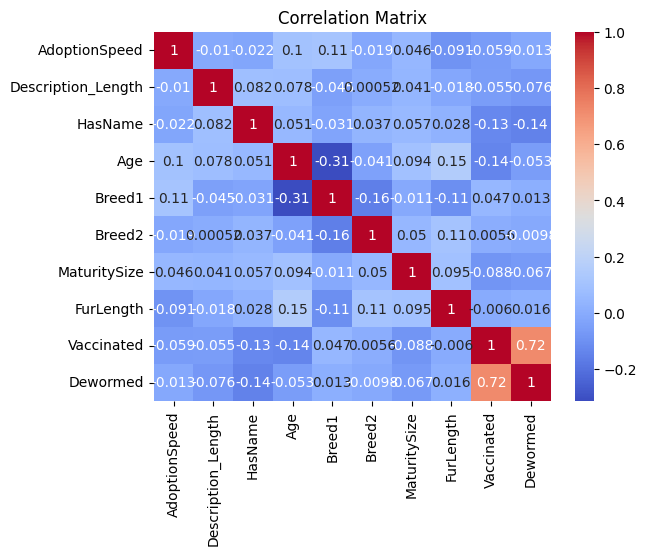

In [269]:
cols = ['AdoptionSpeed','Description_Length','HasName','Age', 'Breed1', 'Breed2', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'VideoAmt', 'PhotoAmt', 'Description_Length', 'HasName', 'Type_1',
       'Type_2', 'Gender_1', 'Gender_2', 'Gender_3']
corr_df = train[cols[:10]]
# # Explore correlations
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [108]:
# checking our new features
train.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  FurLength  Vaccinated  Dewormed  Sterilized  Health  \
0             1          1           2         2           2       1   
1             2          2           3         3           3       1   
2             2          2           1         1           2       1   
3             2          1           1         1           2       1   
4             2          1           2         2           2       1   

   Quantity  Fee  State                         RescuerID  VideoAmt  \
0         1  100  41326  8480853f516546f6cf33aa88cd76c379         0   
1         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14         0   
2         1    0  41326  fa90fa5b1ee11c86938398b60abc32cb         0   
3         1  150  41401  9238e4f44c71a75282e62f7136c6b240         0   
4         1    0  41326  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID  PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3       1.0   
1  I just found it alone yesterday near my apartm...  6296e909a       2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906       7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5       8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90       3.0   

   AdoptionSpeed  Description_Length  HasName  polarity  subjectivity  
0              2                 359        1  0.130357      0.407143  
1              0                 118        1  0.100000      0.400000  
2              3                 393        1  0.261905      0.542857  
3              2                 146        1  0.341146      0.437500  
4              2                 390        1  0.400000      0.743750

# F V 2.5

In [31]:
# Load data
train = pd.read_csv('input/train/train.csv')
test = pd.read_csv('input/test/test.csv')
breed_labels = pd.read_csv('input/breed_labels.csv')
color_labels = pd.read_csv('input/color_labels.csv')
state_labels = pd.read_csv('input/state_labels.csv')
df_image = pd.read_csv("image_features.csv", header = 0)

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_features(train):
    # Creating a new feature based on the length of the description
    train['Description_Length'] = train['Description'].apply(lambda x: len(str(x)))
    # Creating a feature indicating whether a pet has a name or not
    train['HasName'] = train['Name'].apply(lambda x: 0 if pd.isnull(x) else 1)


    train['Polarity'] = train['Description'].astype(str).apply(get_polarity)
    train['Subjectivity'] = train['Description'].astype(str).apply(get_subjectivity)

    # Adding features engineering for train dataset
    to_scale = ['AgeScaled']
    scale_num = ['Age']
    train[to_scale] = (train[scale_num] - train[scale_num].mean()) / train[scale_num].std()

    # Concatenating Breed1, Age and Furlength features
    train['Breed1AgeFurLength'] = (train['Breed1'].astype(str) + np.abs(train['AgeScaled']).astype(str) + train['FurLength'].astype(str)).astype(float)
    train['Breed2AgeFurLength'] = (train['Breed2'].astype(str) + np.abs(train['AgeScaled']).astype(str) + train['FurLength'].astype(str)).astype(float)

    # Concatenating binary features such as Vaccinated, Dewormed and Sterilized
    train['VDSCombination'] = (train['Vaccinated'].astype(str) + train['Dewormed'].astype(str) + train['Sterilized'].astype(str)).astype(float)

    # Creating a color count feature without including cases where any color is 0
    train['ColorCount'] = train[['Color1', 'Color2', 'Color3']].apply(lambda row: len([color for color in row if color != 0]), axis=1)

    # Creating a total visual media feature
    train['TotalVisualMedia'] = train['PhotoAmt'] + train['VideoAmt']

    # Creating a description length feature
    train['DescriptionLength'] = train['Description'].apply(lambda x: len(str(x)))

    # Creating a sentiment score feature
    train['SentimentScore'] = train['Description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    
    #Name_word_len, 'RescuerID_3', 'RescuerID_5', 'Description_len', 'PhotoAmt', 'Name_word_len', 'is_emoji'
    train['Name_word_len'] = train['Name'].fillna('').apply(lambda x : len(x.split(' ')))

    to_drop = ['AgeScaled']
    train = train.drop(to_drop, axis = 1)
    
    # Adding image features to dataset

    # First finding the position of '-' in PetID
    df_image['pos'] = df_image['PetID'].str.find('-')
    df_image.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

    # Using position to slice PetID using a lambda function
    df_image['PetID'] = df_image.apply(lambda x: x['PetID'][0:x['pos']],axis=1)
    
    df_image.drop(columns=['pos'], axis=1, inplace=True)

    train = pd.merge(train, df_image, how="inner", on=["PetID"], copy=True)

    return train
train = get_features(train)

In [11]:

class FEDenseNetP(nn.Module):
    def __init__(self, num_channels=3):
        super().__init__()
        preloaded = torchvision.models.densenet121(pretrained=True)
        self.features = preloaded.features
        self.features.conv0 = nn.Conv2d(num_channels, 64, kernel_size=8, stride=2, padding=3)
        self.average_pool = nn.AvgPool1d(4)
        
        del preloaded

    def forward(self, x):
        features = self.features(x)
        out = F.adaptive_avg_pool2d(features, (1, 1)).view(features.size(0), -1)
        x = self.average_pool(out)
        return x

transformer = transforms.Compose([        # Defining a variable transforms
                    transforms.Resize(256),                # Resize the image to 256×256 pixels
                    transforms.CenterCrop(256),            # Centre Cropping the image to 256×256 pixels about the center
                    transforms.ToTensor(),                 # Convert the image to PyTorch Tensor data type
                    transforms.Normalize(                  # Normalize the image
                    mean=[0.485, 0.456, 0.406],            # Mean and std of image as also used when training the network
                    std=[0.229, 0.224, 0.225]      
                    )])

def get_image_features(img,id='pet_id'):
    
    m = FEDenseNetP()
    m.eval()
    # loadin from PIL requires transformations
    try : 
#         img_t = transformer(img)
        img_t = torch.unsqueeze(img_t,0)
    except:
        img_t = img
        pass
    # fit the image to get the new weights
    y = m(img)
    # reduce dimension
    y = torch.squeeze(y)
    arr = y.data.numpy()
    return arr



   
    


In [7]:
import concurrent.futures
from tqdm import tqdm
from PIL import Image

features = {}
pet_ids = train['PetID'].values
path = 'data/train_images/'

# function to process a single image and return its features
def process_image(pet_id):
    image = Image.open(path + str(pet_id) + '-1.jpg').convert('RGB')
    input_tensor = transformer(image)
    input_batch = input_tensor.unsqueeze(0)
    features = get_image_features(input_batch)
    return pet_id, features

# parallel processing
with concurrent.futures.ThreadPoolExecutor() as executor:
    # Use tqdm to display progress
    with tqdm(total=len(pet_ids), desc="Processing Images", unit="image") as progress_bar:
        # Submit tasks to the executor and retrieve the results
        futures = [executor.submit(process_image, pet_id) for pet_id in pet_ids]
        for future in concurrent.futures.as_completed(futures):
            # Get the result and update the features dictionary
            pet_id, img_feats = future.result()
            features[pet_id] = img_feats
            progress_bar.update(1)
            
train_feats = pd.DataFrame.from_dict(features, orient='index')
train_feats.columns = [f'pic_{i}' for i in range(train_feats.shape[1])]
train_feats = train_feats.reset_index()
train_feats.rename({'index': 'PetID'}, axis='columns', inplace=True)

Processing Images: 100%|████████████████████████████████████████████████████| 58311/58311 [3:02:32<00:00,  5.32image/s]


In [ ]:
n_components = 32
svd_ = TruncatedSVD(n_components=n_components, random_state=1337)

# features_df = pd.concat([train_feats, test_feats], axis=0)
features = train_feats[[f'pic_{i}' for i in range(256)]].values

svd_col = svd_.fit_transform(features)
svd_col = pd.DataFrame(svd_col)
svd_col = svd_col.add_prefix('IMG_SVD_')

all_ids = train['PetID']#pd.concat([train, test], axis=0, ignore_index=True, sort=False)[['PetID']]
img_features = pd.concat([all_ids, svd_col], axis=1)
# img_features.to_csv('img_features_v2_densenet121.csv')

train = train.merge(img_features, how='left', on='PetID')

In [32]:
img_feat2 = pd.read_csv("img_features_densenet121.csv", index_col=0)

In [30]:
train.shape

(409159, 75)

In [38]:
train.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'Description_Length', 'HasName', 'Polarity', 'Subjectivity',
       'Breed1AgeFurLength', 'Breed2AgeFurLength', 'VDSCombination',
       'ColorCount', 'TotalVisualMedia', 'DescriptionLength', 'SentimentScore',
       'Name_word_len', 'Energy', 'Contrast', 'Correlation', 'Entropy', 'Mean',
       'Std_Dev', 'num_checkpoints', 'IMG_SVD_0', 'IMG_SVD_1', 'IMG_SVD_2',
       'IMG_SVD_3', 'IMG_SVD_4', 'IMG_SVD_5', 'IMG_SVD_6', 'IMG_SVD_7',
       'IMG_SVD_8', 'IMG_SVD_9', 'IMG_SVD_10', 'IMG_SVD_11', 'IMG_SVD_12',
       'IMG_SVD_13', 'IMG_SVD_14', 'IMG_SVD_15', 'IMG_SVD_16', 'IMG_SVD_17',
       'IMG_SVD_18', 'IMG_SVD_19', 'IMG_SVD_20', 'IMG_SVD_21', 'IMG_SVD_22',
       'IMG_SVD_23', 'IMG_SVD_

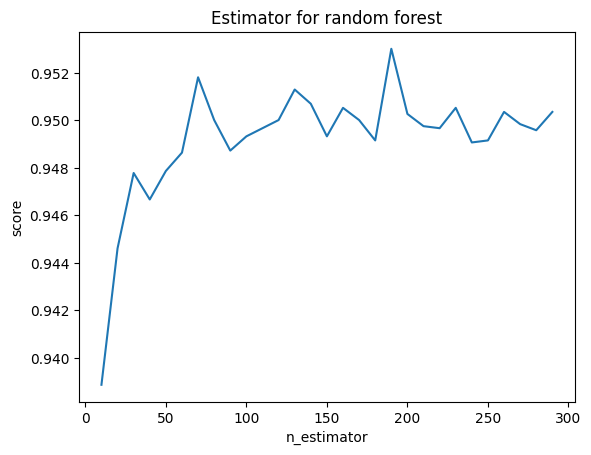

In [50]:
def get_estimators(train):
    cols_to_drop = ['PetID', 'AdoptionSpeed','Description','Name','RescuerID']
    X = train.drop(cols_to_drop, axis=1)
    y = train['AdoptionSpeed']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_jobs=-1)

    # intializing estimators
    estimators = np.arange(10, 300, 10)
    scores = []
    for n in estimators:
        model.set_params(n_estimators=n)
        model.fit(Xtrain, ytrain)
        scores.append(model.score(Xtest, ytest))

    #plotting the graph
    plt.title("Estimator for random forest")
    plt.xlabel("n_estimator")
    plt.ylabel("score")
    plt.plot(estimators, scores)

get_estimators(train)

From above we can either go with 200 parameters for a little bit of score improvement or choose 100 parameters for compute optimization as the score does not vary much.


## With Encoding

In [26]:
def rf_we(train):
    numeric_features = ['Age','Fee','VideoAmt','PhotoAmt','Quantity']

    categorical_features = ['Type', 'Color1', 'Color2', 'Gender', 'MaturitySize', 
                        'FurLength', 'Vaccinated', 'Sterilized', 'Health', 'Breed1','Gender']

    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])


    categorical_transformer = Pipeline(steps=[

        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])


    cols_to_drop = ['PetID', 'AdoptionSpeed','Description','Name','RescuerID']
    X = train.drop(cols_to_drop, axis=1)
    y = train['AdoptionSpeed']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


    model_1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', 
                       RandomForestClassifier(n_jobs=-1, n_estimators=200)
                         )])  
    model_1.fit(X_train,y_train)

    # make predictions on test data
    y_model_randomforest = model_1.predict(X_valid)

    # accuracy score
    train_accuracy_rf = model_1.score(X_train, y_train)
    test_accuracy_rf = model_1.score(X_valid, y_valid)
    print("Random Forest train accuracy: {:.2f}%".format(train_accuracy_rf * 100))
    print("Random Forest test accuracy: {:.2f}%".format(test_accuracy_rf * 100))
    return model_1

In [39]:

rf_we(train)

Random Forest train accuracy: 96.60%
Random Forest test accuracy: 90.61%


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fee', 'VideoAmt',
                                                   'PhotoAmt', 'Quantity']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Color1', 'Color2',
                                                   'Gender', 'MaturitySize',
                                                   'FurLength', 'Vaccinated',
                                                   'Sterilized', 'Health',
                                                   'Breed1', 'Gender'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1))])

(58311, 75)

### Since we have Class Imbalances lets use stratifiedkfold to evaluate

In [19]:


def rf_with_stratified_kfold(train, n_splits=5):
    numeric_features = ['Age','Fee','VideoAmt','PhotoAmt','Quantity']
    categorical_features = ['Type', 'Color1', 'Color2', 'Gender', 'MaturitySize', 
                            'FurLength', 'Vaccinated', 'Sterilized', 'Health', 'Breed1','Gender']

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    cols_to_drop = ['PetID', 'AdoptionSpeed','Description','Name','RescuerID']
    X = train.drop(cols_to_drop, axis=1)
    y = train['AdoptionSpeed']

    # Initialize StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Lists to store accuracy scores for each fold
    train_accuracies = []
    test_accuracies = []

    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_jobs=-1, n_estimators=200))
        ])

        model.fit(X_train, y_train)

        # Making predictions on validation data
        y_model_randomforest = model.predict(X_valid)

        # Accuracy scores
        train_accuracy_rf = model.score(X_train, y_train)
        test_accuracy_rf = model.score(X_valid, y_valid)

        print("Random Forest train accuracy: {:.2f}%".format(train_accuracy_rf * 100))
        print("Random Forest test accuracy: {:.2f}%".format(test_accuracy_rf * 100))

        train_accuracies.append(train_accuracy_rf)
        test_accuracies.append(test_accuracy_rf)

    print("\nAverage Random Forest train accuracy: {:.2f}%".format(sum(train_accuracies) / n_splits * 100))
    print("Average Random Forest test accuracy: {:.2f}%".format(sum(test_accuracies) / n_splits * 100))

    return model

model_with_stratified_kfold = rf_with_stratified_kfold(train, n_splits=5)


Random Forest train accuracy: 98.01%
Random Forest test accuracy: 97.24%
Random Forest train accuracy: 98.02%
Random Forest test accuracy: 97.17%
Random Forest train accuracy: 98.01%
Random Forest test accuracy: 97.17%
Random Forest train accuracy: 98.00%
Random Forest test accuracy: 97.22%
Random Forest train accuracy: 98.02%
Random Forest test accuracy: 97.20%

Average Random Forest train accuracy: 98.01%
Average Random Forest test accuracy: 97.20%


In [42]:
model_with_stratified_kfold = rf_with_stratified_kfold(train, n_splits=5)


Random Forest train accuracy: 96.54%
Random Forest test accuracy: 91.06%
Random Forest train accuracy: 96.54%
Random Forest test accuracy: 91.41%
Random Forest train accuracy: 96.59%
Random Forest test accuracy: 90.94%
Random Forest train accuracy: 96.53%
Random Forest test accuracy: 91.05%
Random Forest train accuracy: 96.60%
Random Forest test accuracy: 90.94%

Average Random Forest train accuracy: 96.56%
Average Random Forest test accuracy: 91.08%


Random Forest train accuracy: 96.60%
Random Forest test accuracy: 90.66%


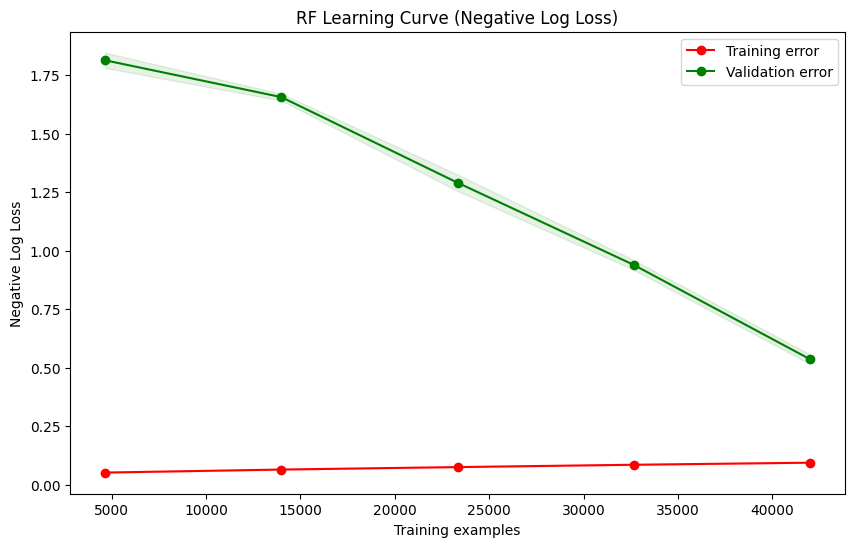

In [52]:


def plot_learning_curve_errors(model, train, title="Learning Curve"):
    cols_to_drop = ['PetID', 'AdoptionSpeed','Description','Name','RescuerID']
    X = train.drop(cols_to_drop, axis=1)
    y = train['AdoptionSpeed']
    train_sizes, train_errors, test_errors = learning_curve(
        model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], scoring='neg_log_loss', n_jobs=-1
    )

    train_errors_mean = -np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = -np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Negative Log Loss")

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_errors_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g", label="Validation error")

    plt.legend(loc="best")
    plt.show()

model = rf_we(train)
plot_learning_curve_errors(model, train, title="RF Learning Curve (Negative Log Loss)")


## GridSearch CV

In [13]:
def gscv_we(train):   
    cols_to_drop = ['PetID', 'AdoptionSpeed','Description','Name','RescuerID']
    X = train.drop(cols_to_drop, axis=1)
    y = train['AdoptionSpeed']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    numerical_columns = train.select_dtypes(include=['number']).drop(['AdoptionSpeed'],axis = 1)
    numeric_features = list(numerical_columns.columns)
    categorical_features = ['Type', 'Color1', 'Color2', 'Gender', 'MaturitySize', 
                        'FurLength', 'Vaccinated', 'Sterilized', 'Health', 'Breed1','Gender']

    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])


    categorical_transformer = Pipeline(steps=[

        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Fitting the preprocessor on the training data
    preprocessor.fit(X_train)

    # pipeline for preprocessor and randomforest
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', 
                       RandomForestClassifier()
                         )])  



    # # Create the parameter grid based on the results of random search 
    param_grid = {
        'classifier__bootstrap': [True],  # Method of selecting samples for training each tree
        'classifier__max_depth': [120, 140, 150, 160],  # Maximum number of levels in tree
        'classifier__min_samples_leaf': [3, 4, 5],  # Minimum number of samples required at each leaf node
        'classifier__min_samples_split': [8, 10, 12],  # Minimum number of samples required to split a node
        'classifier__n_estimators': [100, 200, 300]  # Number of trees in random forest
    }

 


    # Instantiate the grid search model
    grid = GridSearchCV(estimator = pipeline, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)#scoring='accuracy'
    grid.fit(X_train, y_train);
    
    print(grid.best_params_)

    model = grid.best_estimator_
    y_model = model.predict(X_valid)
    y_model_train = model.predict(X_train)

    # accuracy score
    train_accuracy_rf = model.score(X_train, y_train)
    test_accuracy_rf = model.score(X_valid, y_valid)
    print("Random Forest train accuracy: {:.2f}%".format(train_accuracy_rf * 100))
    print("Random Forest test accuracy: {:.2f}%".format(test_accuracy_rf * 100))
    
    return model


In [41]:
%%time gscv_we(train) # fv2.5

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest train accuracy: 98.52%
Random Forest test accuracy: 88.65%


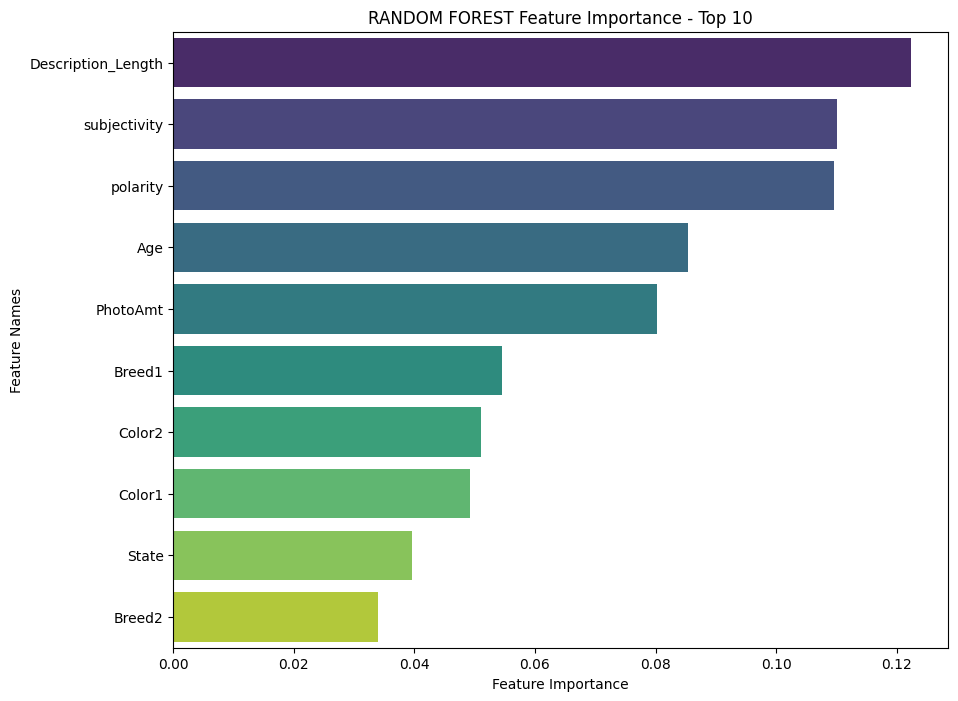

In [38]:
model = rf_we(train)
columns = X.columns
plot_feature_importance(model.feature_importances_,columns[:],'RANDOM FOREST',10)


In [47]:


def lime_interpretations(train):
    cols_to_drop = ['PetID', 'AdoptionSpeed', 'Description', 'Name', 'RescuerID']
    X = train.drop(cols_to_drop, axis=1)
    y = train['AdoptionSpeed']


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a simple model (e.g., RandomForestClassifier)
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    # Initialize LIME explainer
    explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns)

    # Choose an instance from the test set for interpretation
    instance_to_explain = X_test.iloc[0]

    # Explain the instance using LIME
    exp = explainer.explain_instance(instance_to_explain.values, model.predict_proba, num_features=len(X_train.columns))

    # Display the explanation
    exp.show_in_notebook()


In [49]:
lime_interpretations(train)